# BCG - PowerCo customer churn problem : Forage Project

## Background
This [challenge](https://www.theforage.com/virtual-internships/prototype/Tcz8gTtprzAS4xSoK/Data-Science-?ref=D7dEe4AjnkT7G8uPb) is about predicting the customer churn of one of BCG's clients called PowerCo. PowerCo is a leader, specializing in gas and electricity distribution to residential neighburhoods and SMEs. Due to liberalization policies in the power sector, many companies are being forced to reduce their long-run average costs in order to remain competitive in the market. They want a new, viable and effective pricing stategy to combat customer churn. PowerCo wants to explore the possibility of a 20% discounted rate preventing customer churn and have commissioned BCG to test this hypothesis. They also want us to define and assess customer's price sensitivity. 

## TASK 1: Business Understanding & Hypothesis Framing
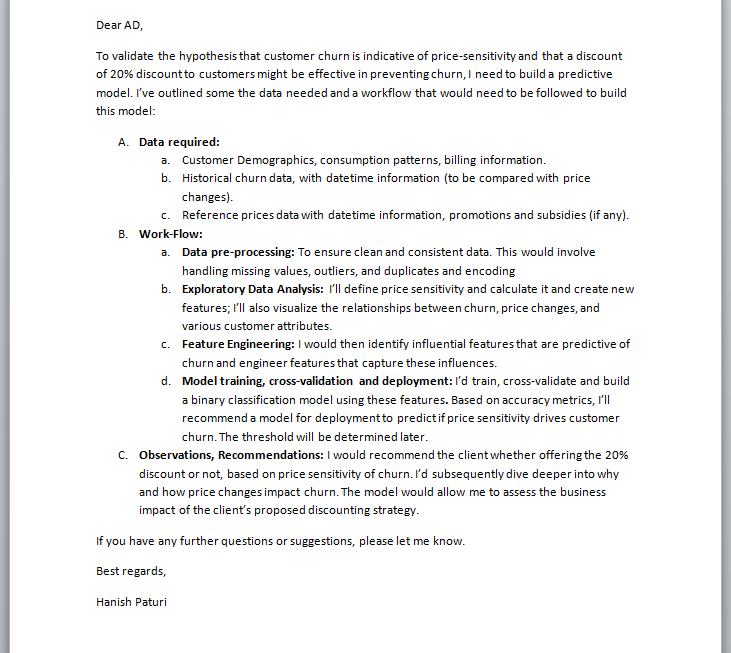

## TASK 2: Exploratory Data Analysis

BCG has been given the following sub-tasks to carry-out in this step.

### Sub-Task 1:

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

### Sub-Task 2:

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.


### Sub-Task 3:

Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.

For your final deliverable, please submit your analysis (in the form of a jupyter notebook, code script or PDF) as well as your half-page summary document.

**Note:** Use the 2 datasets within the additional resources for this task and if you’re unsure on where to start with visualizing data, use the accompanying links. Be sure to also use the data description document to understand what the columns represent. The task description document outlines the higher-level motivation of the project. Finally, use the eda_starter.ipynb file to get started with some helper functions and methods.

If you are stuck: Think about ways you can define price sensitivity. Make sure to think of all possible ways and investigate them.

Estimated time for task completion: 1.75 hours depending on your learning style.

## TASK 2 Outline: EDA

### Sub-task 1: 
1. Exploratory Data Analysis, to look for important features, trends and patterns, and to to analyze missing values, outliers, etc
2. Check and identify whether the churn happened  with a price increase 3 months prior.

### Sub-task 2:
1. We will define price sensitivity of churn at a given reference price as the % of customers churned within 3 months of a positive change in prices. Soft churn (if present) will be considered as hard churn. We will look into other definitions of price sensiivity at a later stage after exploring the raw data.

2. We will test the null hypothesis that customer churn is sensitive to price increase. The alternate hypohesis being that customer churn is insensitive to price increae. We will check this for a 95% confidence interval (of all churn observations).


### Sub-task 3:
Report write-up with summary findings and suggestions for data augmentation.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, scipy
from scipy.stats import skew, pearsonr
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=15,8

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import IPython
from IPython.display import display
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plot style
sns.set(color_codes=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [4]:
client = pd.read_csv('/kaggle/input/bcg-intership-files/client_data.csv')
price = pd.read_csv('/kaggle/input/bcg-intership-files/price_data.csv')

client_data.csv

●	id = client company identifier

●	activity_new = category of the company’s activity

●	channel_sales = code of the sales channel

●	cons_12m = electricity consumption of the past 12 months

●	cons_gas_12m = gas consumption of the past 12 months

●	cons_last_month = electricity consumption of the last month

●	date_activ = date of activation of the contract

●	date_end = registered date of the end of the contract

●	date_modif_prod = date of the last modification of the product

●	date_renewal = date of the next contract renewal

●	forecast_cons_12m = forecasted electricity consumption for next 12 months

●	forecast_cons_year = forecasted electricity consumption for the next calendar year

●	forecast_discount_energy = forecasted value of current discount

●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 12 months

●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

●	has_gas = indicated if client is also a gas client

●	imp_cons = current paid consumption

●	margin_gross_pow_ele = gross margin on power subscription

●	margin_net_pow_ele = net margin on power subscription

●	nb_prod_act = number of active products and services

●	net_margin = total net margin

●	num_years_antig = antiquity of the client (in number of years)

●	origin_up = code of the electricity campaign the customer first subscribed to

●	pow_max = subscribed power

●	churn = has the client churned over the next 3 months


Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


price_data.csv

●	id = client company identifier

●	price_date = reference date

●	price_off_peak_var = price of energy for the 1st period (off peak)

●	price_peak_var = price of energy for the 2nd period (peak)

●	price_mid_peak_var = price of energy for the 3rd period (mid peak)

●	price_off_peak_fix = price of power for the 1st period (off peak)

●	price_peak_fix = price of power for the 2nd period (peak)

●	price_mid_peak_fix = price of power for the 3rd period (mid peak)

# Sub-task 1: EDA


In [4]:
price['fixed_price_component'] = price[['price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix']].sum(axis=1)
price['var_price_component'] = price[['price_off_peak_var','price_peak_var','price_mid_peak_var']].sum(axis=1)
price['off_peak_price_component'] = price[['price_off_peak_fix', 'price_off_peak_var']].sum(axis=1)
price['mid_peak_price_component'] = price[['price_mid_peak_fix', 'price_mid_peak_var']].sum(axis=1)
price['peak_price_component']=price[['price_peak_fix', 'price_peak_var']].sum(axis=1)
price['monthly_bill'] = price[['fixed_price_component','var_price_component']].sum(axis=1)

In [24]:
price.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01               0.151   
1  038af19179925da21a25619c5a24b745 2015-02-01               0.151   
2  038af19179925da21a25619c5a24b745 2015-03-01               0.151   
3  038af19179925da21a25619c5a24b745 2015-04-01               0.150   
4  038af19179925da21a25619c5a24b745 2015-05-01               0.150   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0           0.000               0.000              44.267           0.000   
1           0.000               0.000              44.267           0.000   
2           0.000               0.000              44.267           0.000   
3           0.000               0.000              44.267           0.000   
4           0.000               0.000              44.267           0.000   

   price_mid_peak_fix  fixed_price_component  var_price_component  \
0               0.000                 44.267                0.151   
1               0.000                 44.267                0.151   
2               0.000                 44.267                0.151   
3               0.000                 44.267                0.150   
4               0.000                 44.267                0.150   

   off_peak_price_component  mid_peak_price_component  peak_price_component  \
0                    44.418                     0.000                 0.000   
1                    44.418                     0.000                 0.000   
2                    44.418                     0.000                 0.000   
3                    44.417                     0.000                 0.000   
4                    44.417                     0.000                 0.000   

   monthly_bill  
0        44.418  
1        44.418  
2        44.418  
3        44.417  
4        44.417

In [6]:
client.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23              0.000                   0   
1      2009-08-21   2015-08-31            189.950                   0   
2      2010-04-16   2015-04-17             47.960                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                     0.000                    1.780   
1                     0.000                   16.270   
2                     0.000                   38.720   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                           0.114                       0.098   
1                           0.146                       0.000   
2                           0.166                       0.088   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                       40.607       t     0.000                25.440   
1                       44.311       f     0.000                16.380   
2                       44.311       f     0.000                28.600   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0              25.440            2     678.990                3   
1              16.380            1      18.890                6   
2              28.600            1       6.600                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0

In [7]:
client.iloc[0]

id                                24011ae4ebbe3035111d65fa7c15bc57
channel_sales                     foosdfpfkusacimwkcsosbicdxkicaua
cons_12m                                                         0
cons_gas_12m                                                 54946
cons_last_month                                                  0
date_activ                                              2013-06-15
date_end                                                2016-06-15
date_modif_prod                                         2015-11-01
date_renewal                                            2015-06-23
forecast_cons_12m                                            0.000
forecast_cons_year                                               0
forecast_discount_energy                                     0.000
forecast_meter_rent_12m                                      1.780
forecast_price_energy_off_peak                               0.114
forecast_price_energy_peak                                   0

In [8]:
from collections import Counter
churn_count = Counter(client.churn)
churn_count

Counter({1: 1419, 0: 13187})

## The target class distribution seems to be highly imbalanced which may impact our model performance. We might have to overcome this using synthetic data generation in the next step of this challenge (Feature Engineering).

In [9]:
client.info(), price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

(None, None)

In [10]:
client.describe(include='all', datetime_is_numeric=True)

id                     channel_sales  \
count                              14606                             14606   
unique                             14606                                 8   
top     24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
freq                                   1                              6754   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

          cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
count    14606.000     14606.000        14606.000       14606       14606   
unique         NaN           NaN              NaN        1796         368   
top            NaN           NaN              NaN  2009-08-01  2016-02-01   
freq           NaN           NaN              NaN          95         145   
mean    159220.286     28092.375        16090.270         NaN         NaN   
std     573465.264    162973.059        64364.196         NaN         NaN   
min          0.000         0.000            0.000         NaN         NaN   
25%       5674.750         0.000            0.000         NaN         NaN   
50%      14115.500         0.000          792.500         NaN         NaN   
75%      40763.750         0.000         3383.000         NaN         NaN   
max    6207104.000   4154590.000       771203.000         NaN         NaN   

       date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
count            14606        14606          14606.000           14606.000   
unique            2129          386                NaN                 NaN   
top         2015-11-01   2015-06-23                NaN                 NaN   
freq               721          587                NaN                 NaN   
mean               NaN          NaN           1868.615            1399.763   
std                NaN          NaN           2387.572            3247.786   
min                NaN          NaN              0.000               0.000   
25%                NaN          NaN            494.995               0.000   
50%                NaN          NaN           1112.875             314.000   
75%                NaN          NaN           2401.790            1745.750   
max                NaN          NaN          82902.830          175375.000   

        forecast_discount_energy  forecast_meter_rent_12m  \
count                  14606.000                14606.000   
unique                       NaN                      NaN   
top                          NaN                      NaN   
freq                         NaN                      NaN   
mean                       0.967                   63.087   
std                        5.108                   66.166   
min                        0.000                    0.000   
25%                        0.000                   16.180   
50%                        0.000                   18.795   
75%                        0.000                  131.030   
max                       30.000                  599.310   

        forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                        14606.000                   14606.000   
unique                             NaN                         NaN   
top                                NaN                         NaN   
freq                               NaN                         NaN   
mean                             0.137                       0.050   
std                              0.025                       0.049   
min             

In [11]:
price.describe(include='all', datetime_is_numeric=True)

id  price_date  price_off_peak_var  \
count                             193002      193002          193002.000   
unique                             16096          12                 NaN   
top     038af19179925da21a25619c5a24b745  2015-08-01                 NaN   
freq                                  12       16094                 NaN   
mean                                 NaN         NaN               0.141   
std                                  NaN         NaN               0.025   
min                                  NaN         NaN               0.000   
25%                                  NaN         NaN               0.126   
50%                                  NaN         NaN               0.146   
75%                                  NaN         NaN               0.152   
max                                  NaN         NaN               0.281   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
count       193002.000          193002.000          193002.000   
unique             NaN                 NaN                 NaN   
top                NaN                 NaN                 NaN   
freq               NaN                 NaN                 NaN   
mean             0.055               0.030              43.334   
std              0.050               0.036               5.410   
min              0.000               0.000               0.000   
25%              0.000               0.000              40.729   
50%              0.085               0.000              44.267   
75%              0.102               0.073              44.445   
max              0.230               0.114              59.445   

        price_peak_fix  price_mid_peak_fix  fixed_price_component  \
count       193002.000          193002.000             193002.000   
unique             NaN                 NaN                    NaN   
top                NaN                 NaN                    NaN   
freq               NaN                 NaN                    NaN   
mean            10.623               6.410                 60.367   
std             12.842               7.774                 20.456   
min              0.000               0.000                  0.000   
25%              0.000               0.000                 44.267   
50%              0.000               0.000                 44.445   
75%             24.340              16.226                 81.132   
max             36.491              17.458                104.032   

        var_price_component  off_peak_price_component  \
count            193002.000                193002.000   
unique                  NaN                       NaN   
top                     NaN                       NaN   
freq                    NaN                       NaN   
mean                  0.226                    43.476   
std                   0.074                     5.421   
min                   0.000                     0.000   
25%                   0.150                    40.847   
50%                   0.253                    44.416   
75%                   0.295                    44.589   
max                   0.490                    59.725   

        mid_peak_price_component  peak_price_component  monthly_bill  
count                 193002.000            193002.000    193002.000  
unique                       NaN                   NaN           NaN  
top                          NaN                   NaN           NaN  
freq                         NaN                   NaN           NaN  
mean                       6.440                10.678        60.593  
std                        7.809                12.882        20.517  
min                        0.000                 0.000         0.000  
25%                        0.000                 0.000        44.419  
50%                        0.000                 0.085        44.598  
75%                       16.300                24.447        81.444  
max                       17.549     

In [12]:
client.isna().sum(), price.isna().sum()

(id                                0
 channel_sales                     0
 cons_12m                          0
 cons_gas_12m                      0
 cons_last_month                   0
 date_activ                        0
 date_end                          0
 date_modif_prod                   0
 date_renewal                      0
 forecast_cons_12m                 0
 forecast_cons_year                0
 forecast_discount_energy          0
 forecast_meter_rent_12m           0
 forecast_price_energy_off_peak    0
 forecast_price_energy_peak        0
 forecast_price_pow_off_peak       0
 has_gas                           0
 imp_cons                          0
 margin_gross_pow_ele              0
 margin_net_pow_ele                0
 nb_prod_act                       0
 net_margin                        0
 num_years_antig                   0
 origin_up                         0
 pow_max                           0
 churn                             0
 dtype: int64,
 id                    

There seems to be no null values. Let's explore further.

## Lets convert the object features with date data to datetime type.

In [13]:
## Lets first convert the object features with date data to datetime type
price_date_features =['date_activ','date_end','date_modif_prod', 'date_renewal']
for feature in price_date_features:
    client[feature] = pd.to_datetime(client[feature])
price['price_date'] = pd.to_datetime(price['price_date'])

### Categorical type to be given as int
client['churn']=client['churn'].astype('int') 

In [14]:
#merged_data['delta_price_dt_end_date'] = merged_data['date_end'] - merged_data['price_date']
    
## Lets add three new columns. adding suffix syn to synthetic features.
client['contract_start_year_syn'] = client['date_activ'].dt.year
client['contract_end_year_syn'] = client['date_end'].dt.year
client['period_subscribed_syn'] = client['contract_end_year_syn']-client['contract_start_year_syn']

In [15]:
#Lets subset the dataframe into feature groups for analysis
client_cat=client.select_dtypes('object')
client_num=client.select_dtypes('number')
client_date=client.select_dtypes('datetime')

num_features_discrete = [feature for feature in client_num.columns if client[feature].nunique()<25]
client_num_discrete = client[num_features_discrete]

features_cont = list(set(client_num.nunique().index.tolist())-set(num_features_discrete))
client_num_cont = client[features_cont]

## datetime features
client_datetime = client[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'contract_start_year_syn', 'contract_end_year_syn',
       'period_subscribed_syn']]

In [16]:
client_datetime

date_activ   date_end date_modif_prod date_renewal  \
0     2013-06-15 2016-06-15      2015-11-01   2015-06-23   
1     2009-08-21 2016-08-30      2009-08-21   2015-08-31   
2     2010-04-16 2016-04-16      2010-04-16   2015-04-17   
3     2010-03-30 2016-03-30      2010-03-30   2015-03-31   
4     2010-01-13 2016-03-07      2010-01-13   2015-03-09   
...          ...        ...             ...          ...   
14601 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14602 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14603 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14604 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14605 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       contract_start_year_syn  contract_end_year_syn  period_subscribed_syn  
0                         2013                   2016                      3  
1                         2009                   2016                      7  
2                         2010                   2016                      6  
3                         2010                   2016                      6  
4                         2010                   2016                      6  
...                        ...                    ...                    ...  
14601                     2012                   2016                      4  
14602                     2012                   2016                      4  
14603                     2012                   2016                      4  
14604                     2012                   2016                      4  
14605                     2009                   2016                      7  

[14606 rows x 7 columns]

In [17]:
# Lets check for value_counts for cat columns
for i in client_cat.columns[1:]:
    print( client_cat.loc[:,i].value_counts())
    print('\n\n')   

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64



f    11955
t     2651
Name: has_gas, dtype: int64



lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64





In [18]:
client.shape

(14606, 29)

## Now let's track these different feature groups

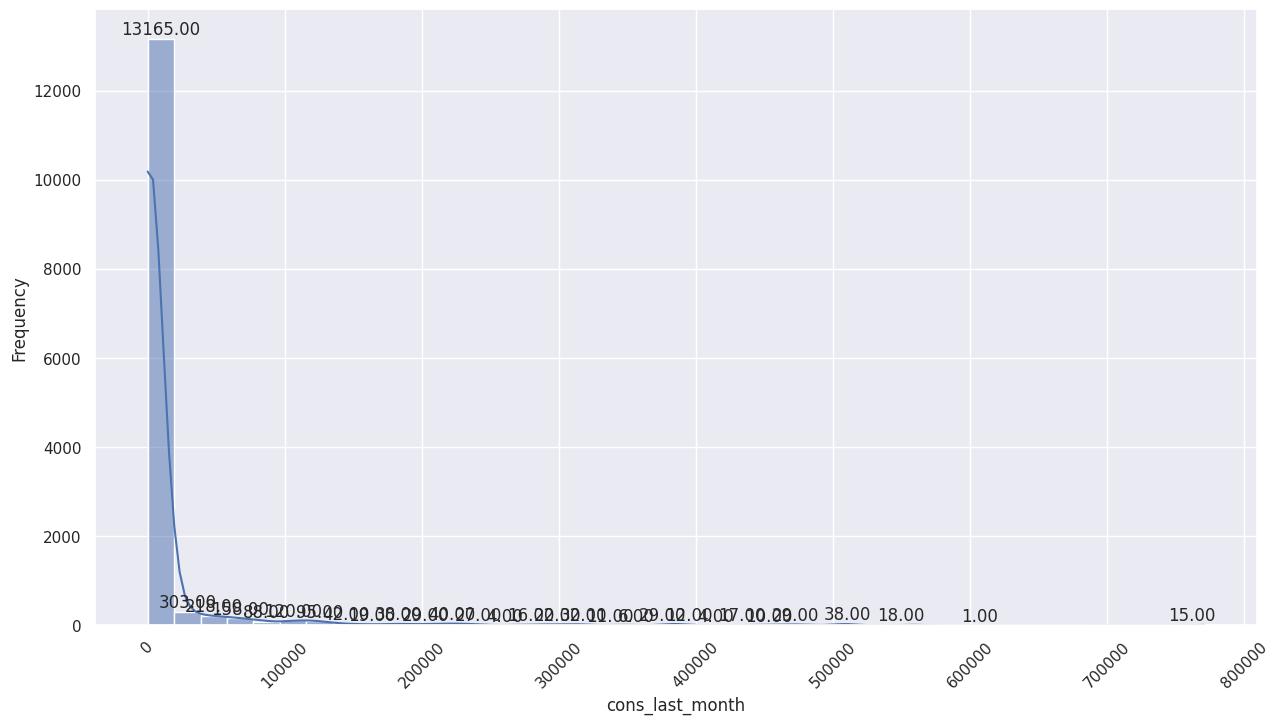

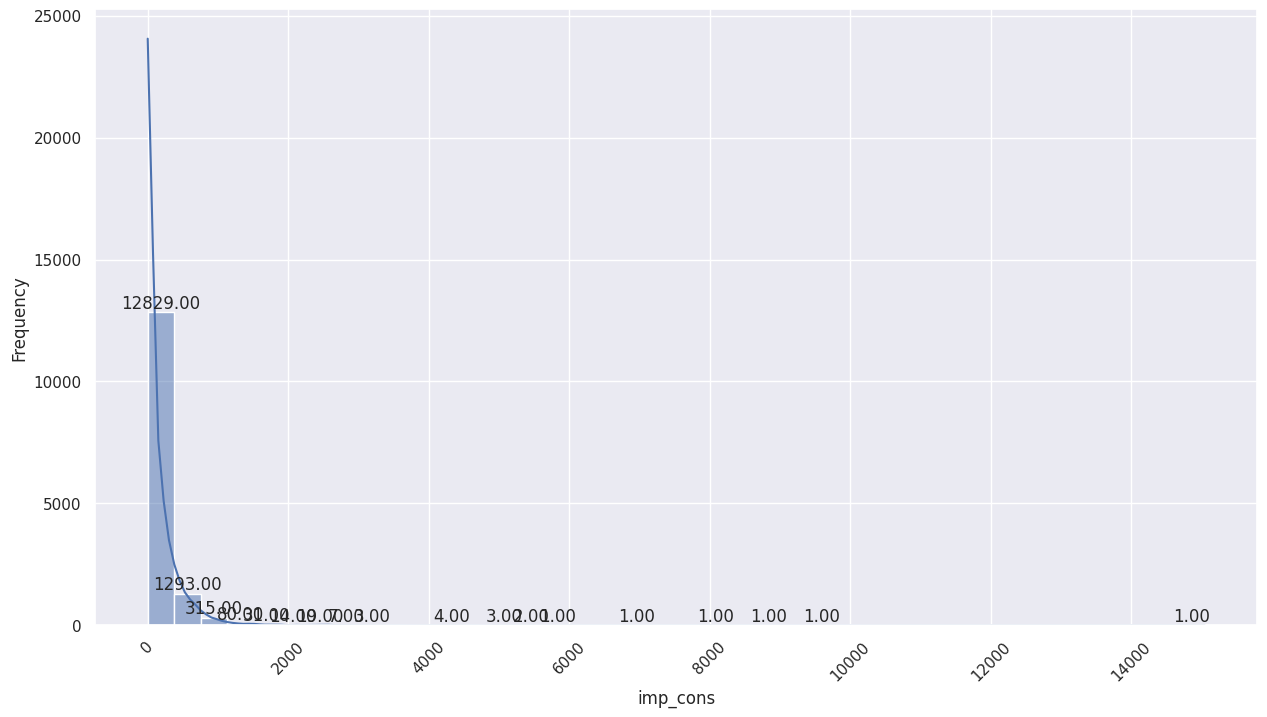

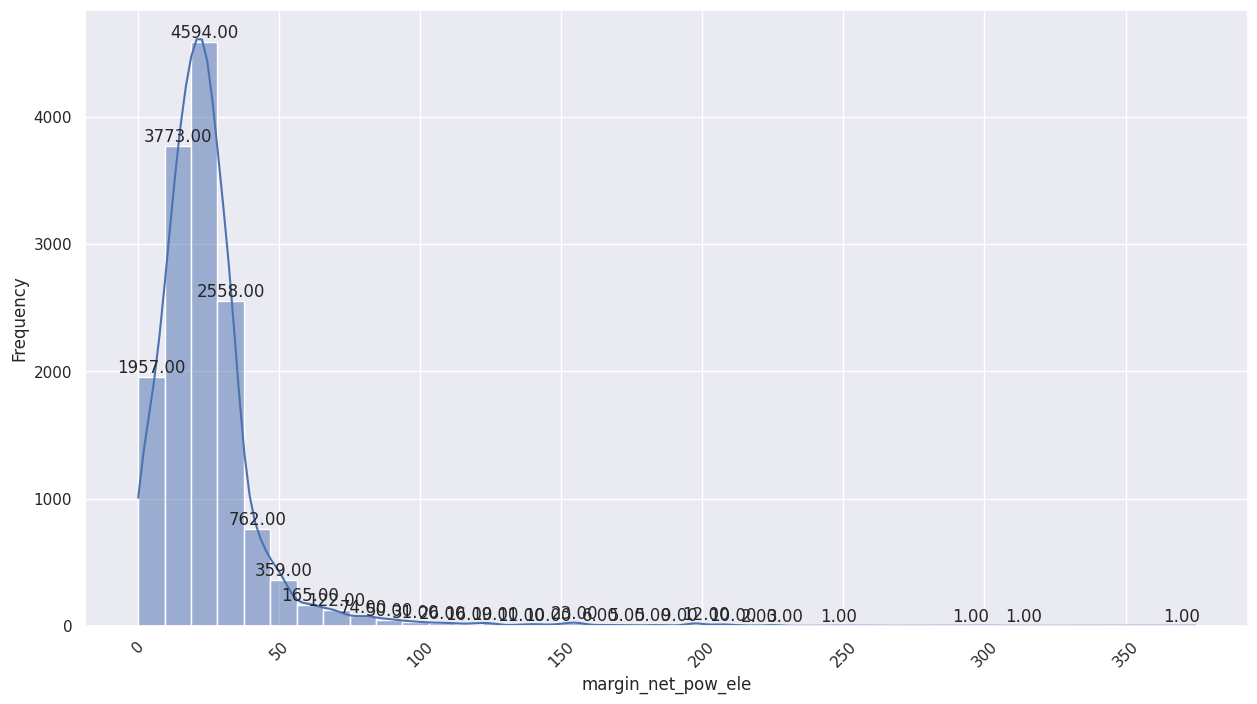

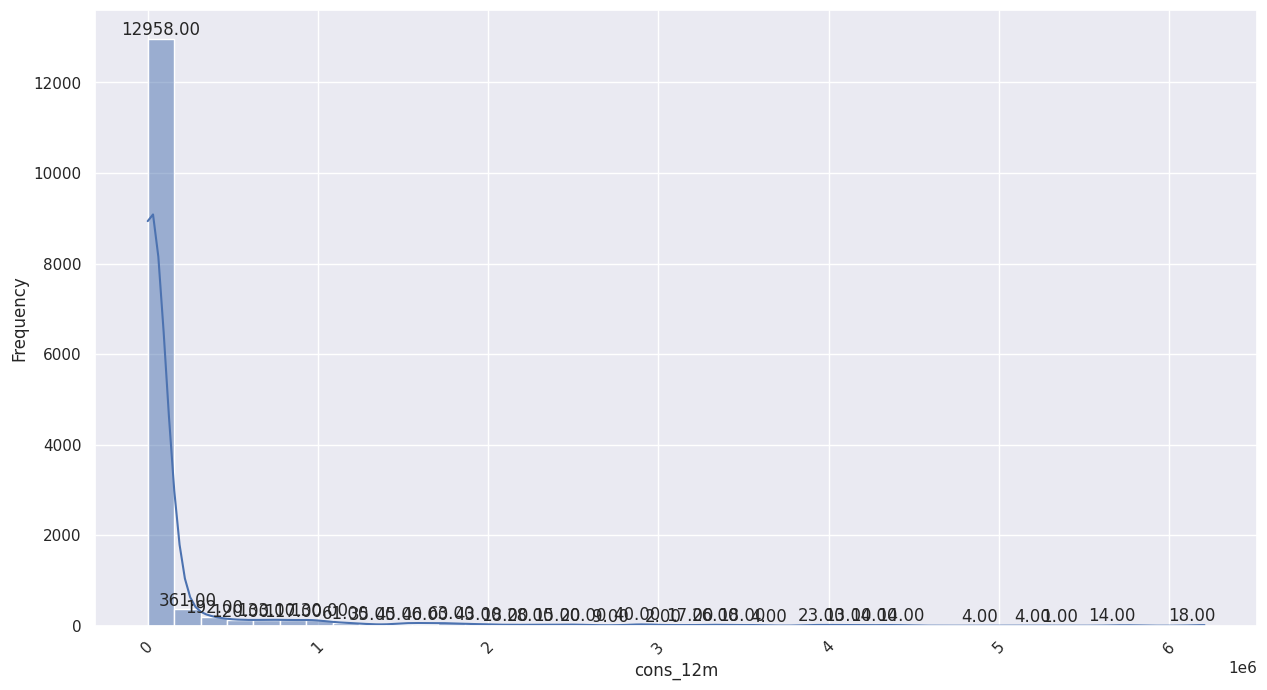

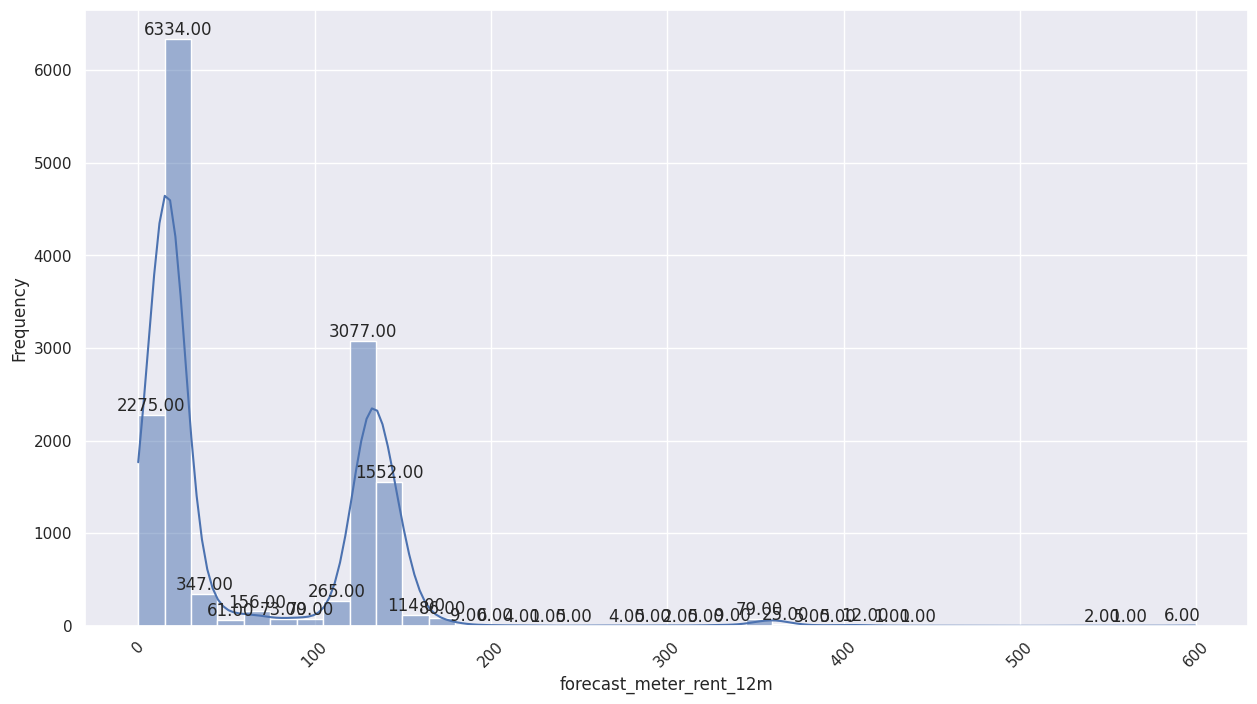

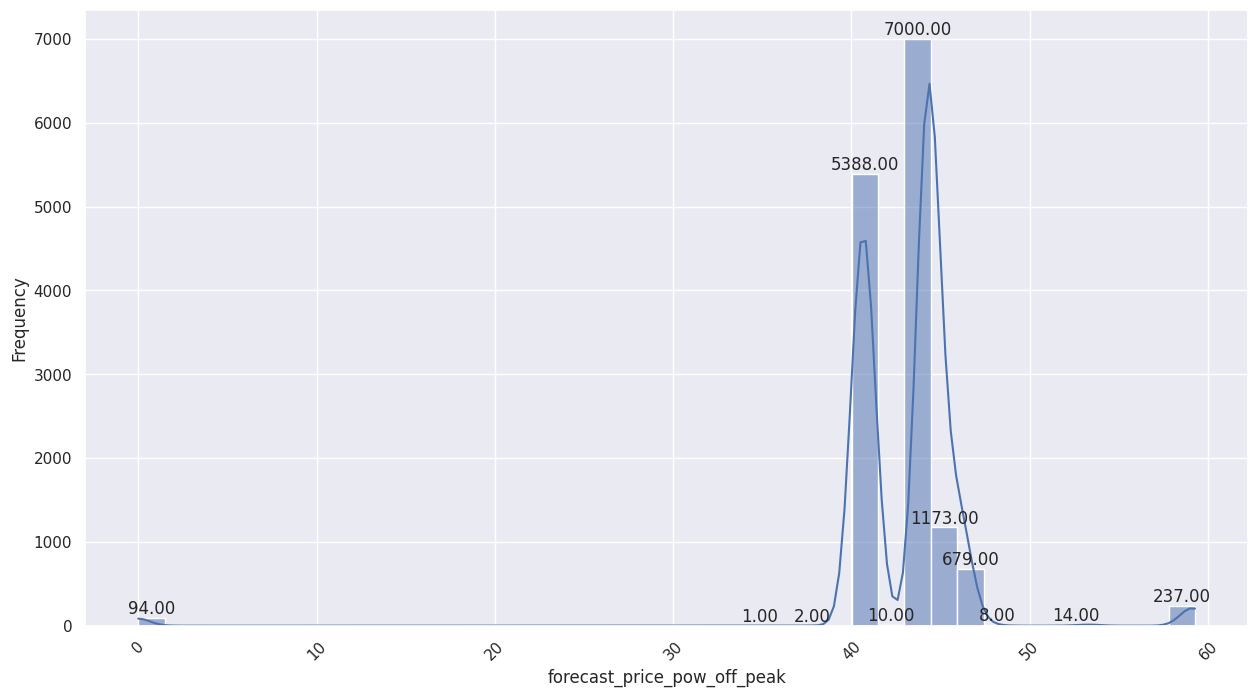

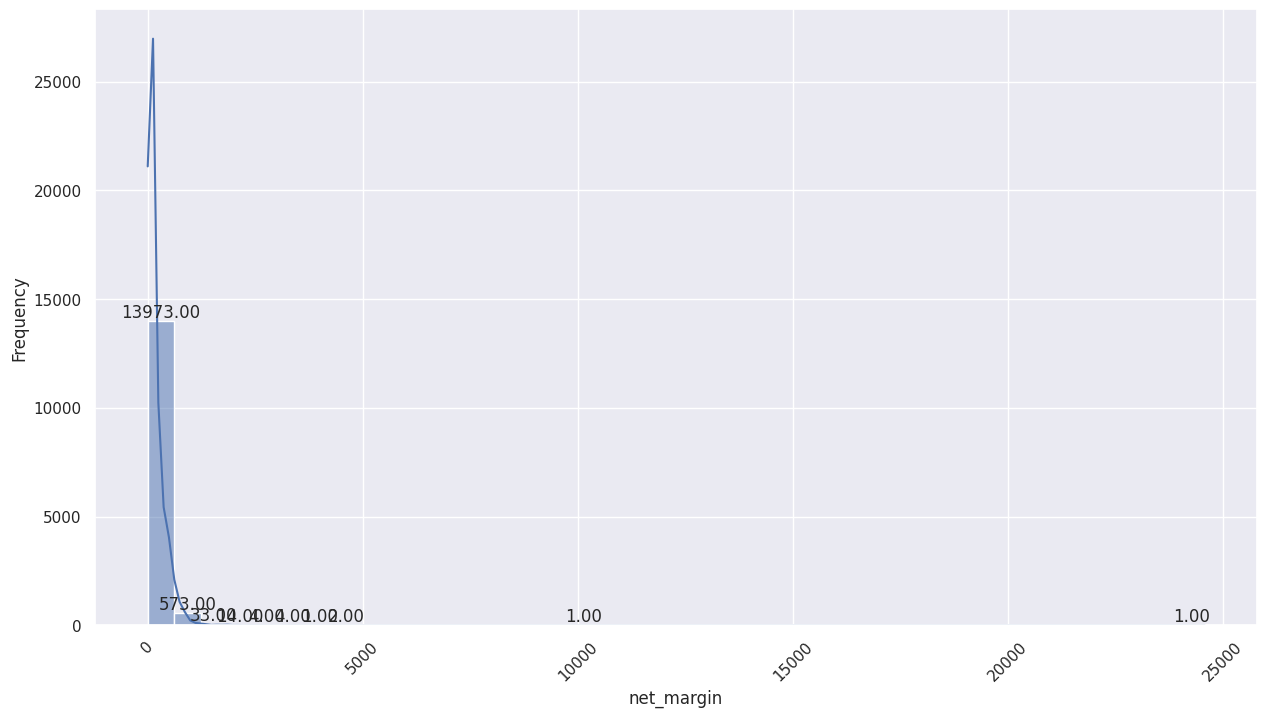

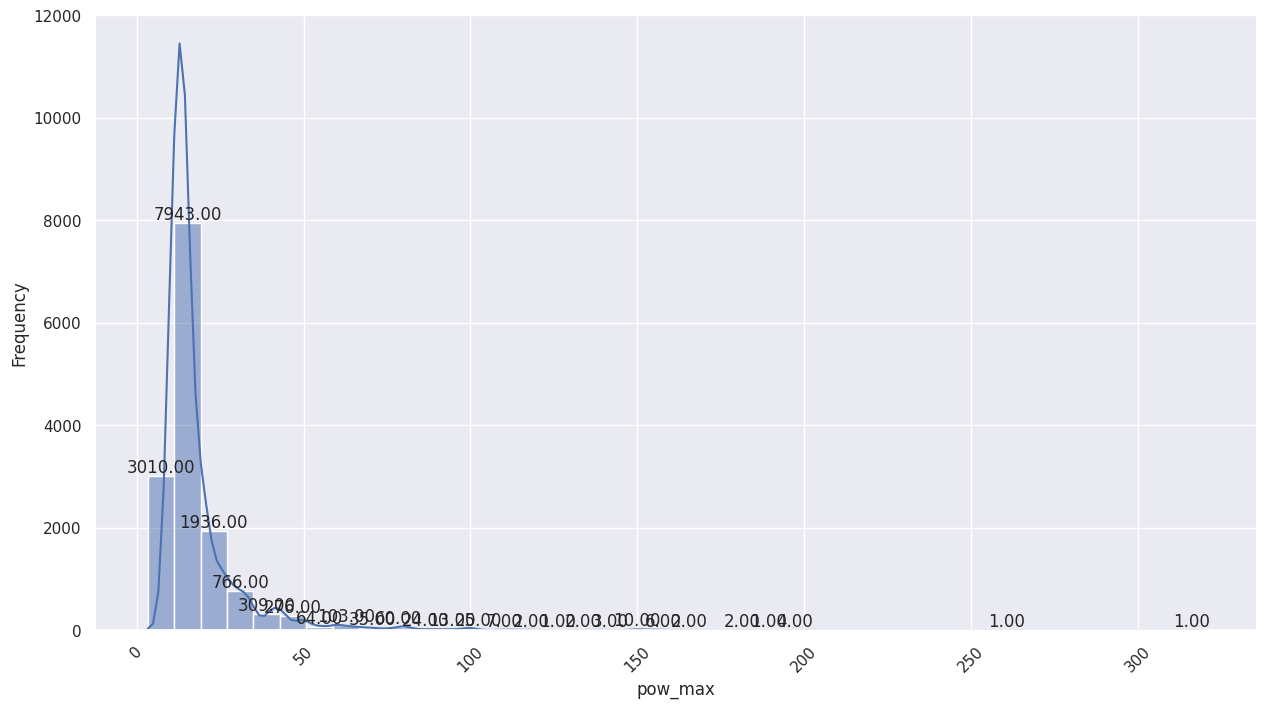

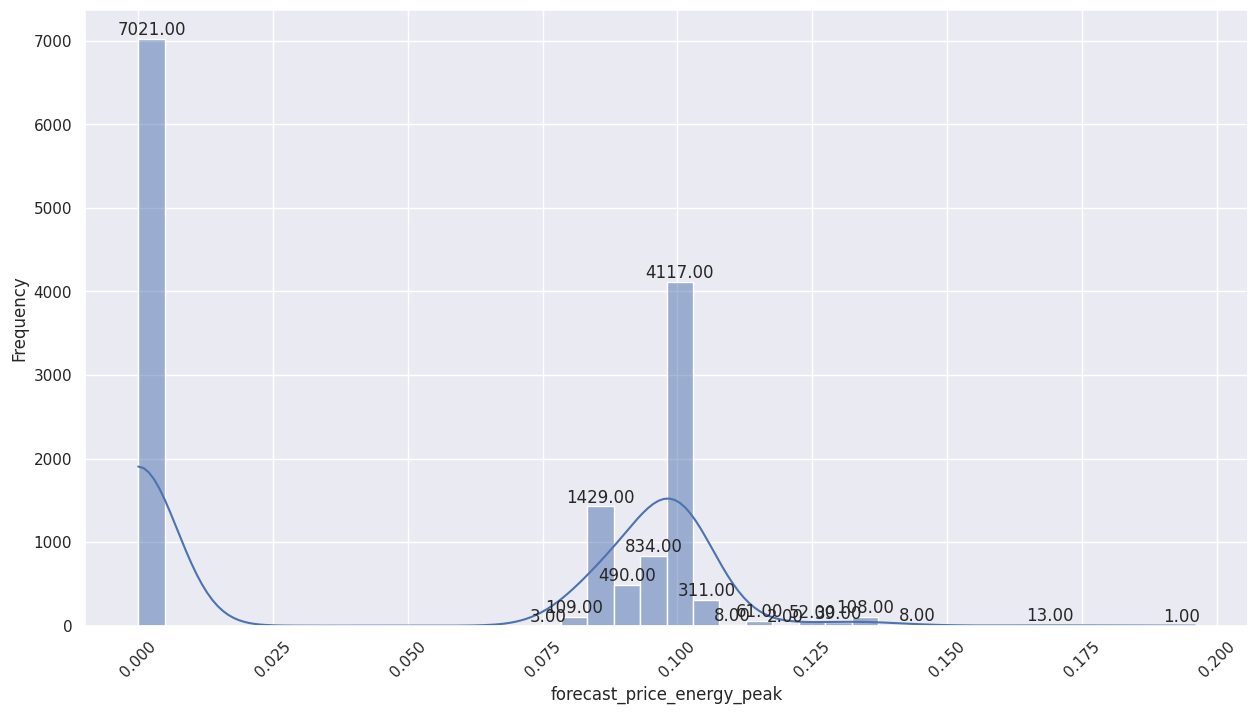

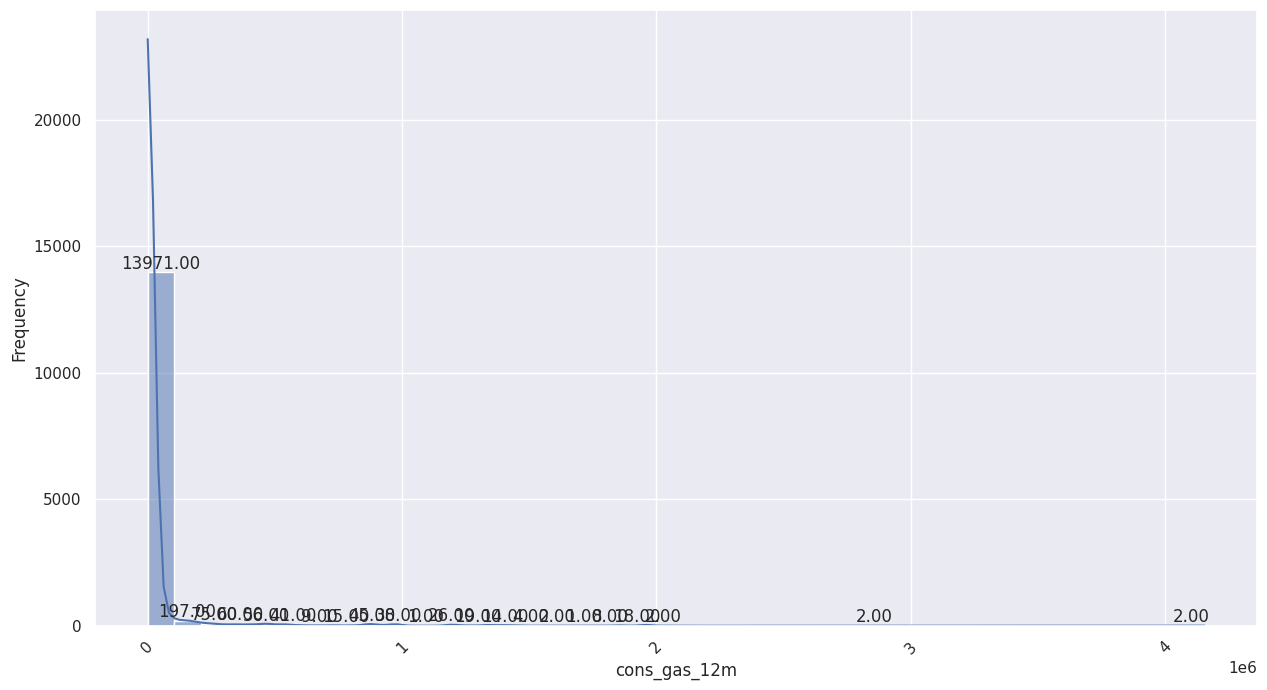

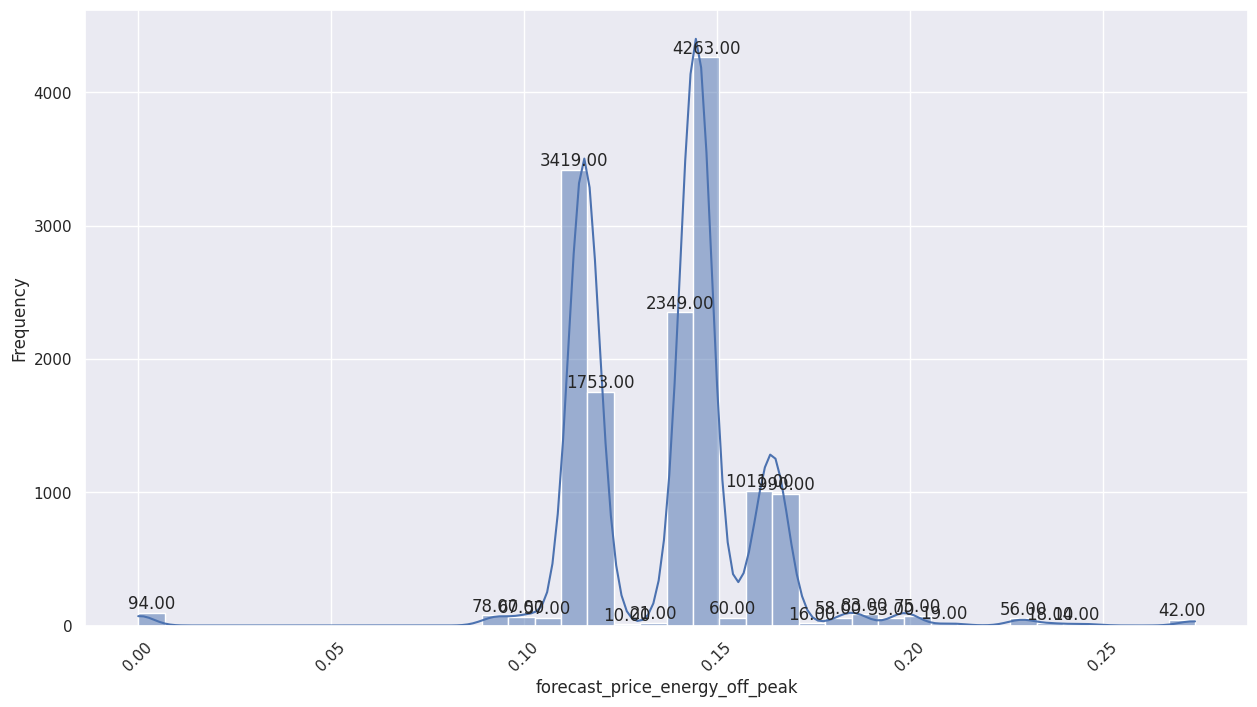

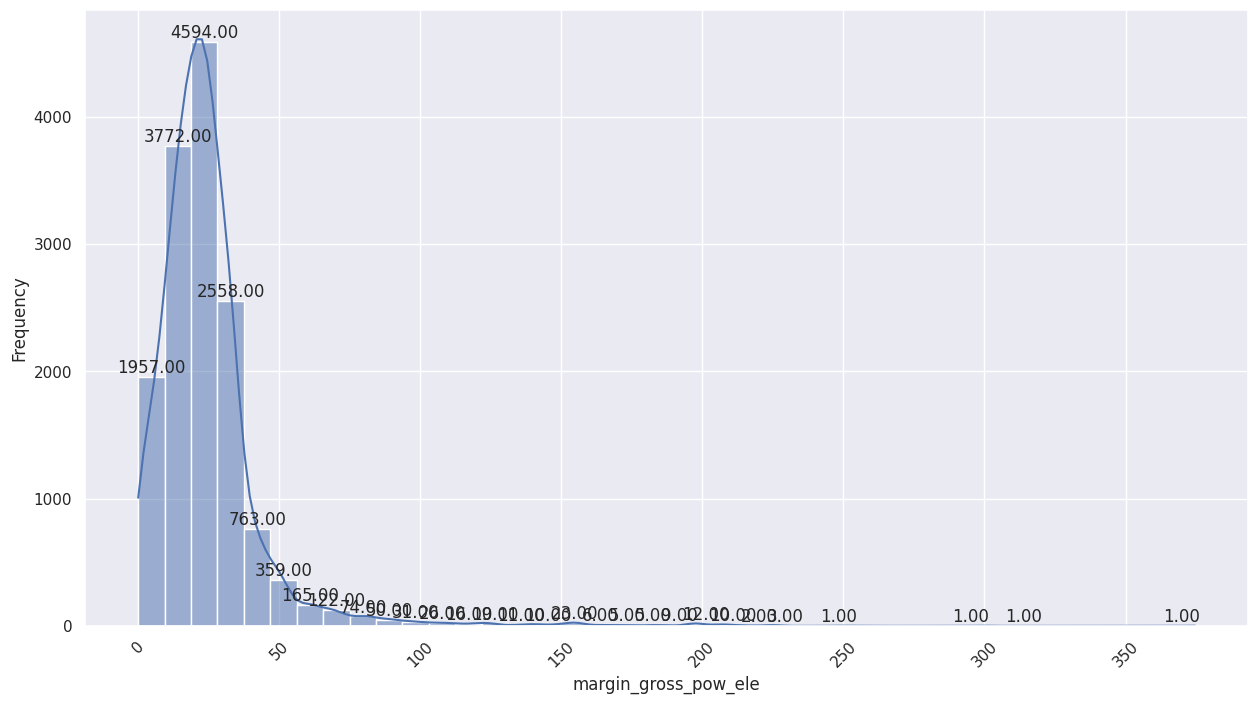

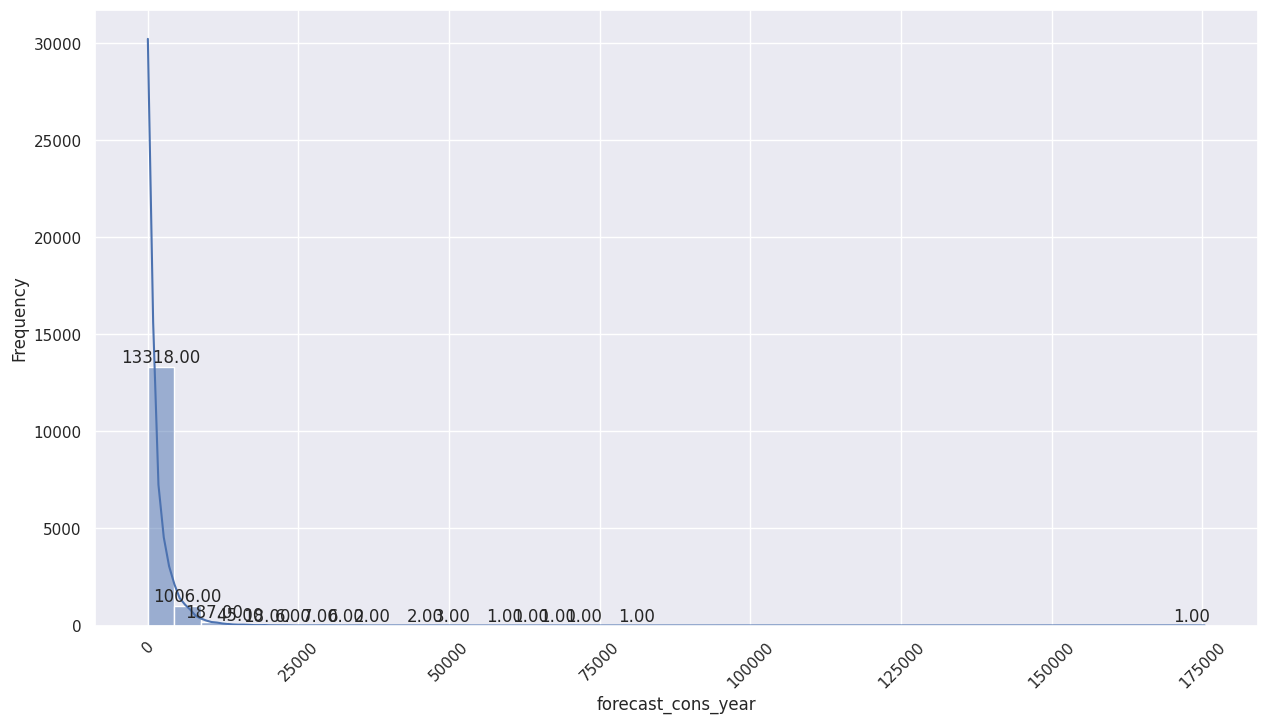

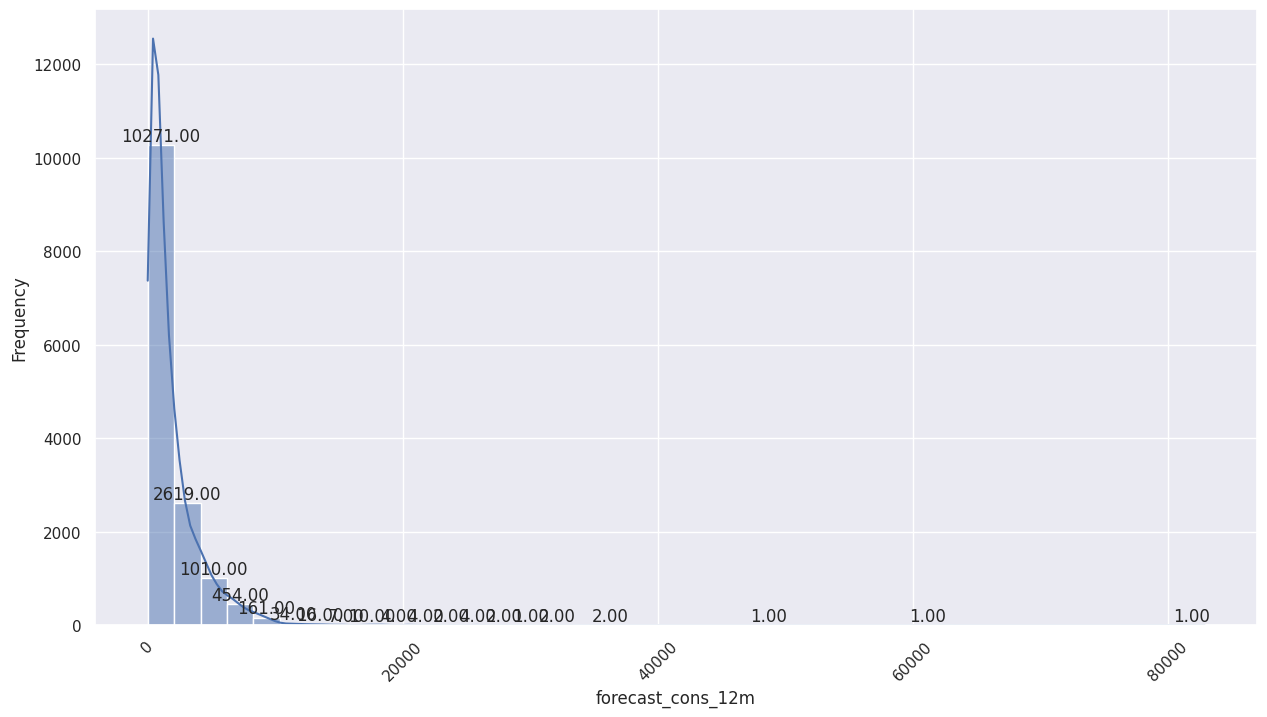

['cons_last_month',
 'imp_cons',
 'margin_net_pow_ele',
 'cons_12m',
 'forecast_meter_rent_12m',
 'forecast_price_pow_off_peak',
 'net_margin',
 'pow_max',
 'forecast_price_energy_peak',
 'cons_gas_12m',
 'forecast_price_energy_off_peak',
 'margin_gross_pow_ele',
 'forecast_cons_year',
 'forecast_cons_12m']

In [19]:
## Numeric, continuous features
num_bins = 40

for i in features_cont:        
    # plot the frequency histogram
    fig, ax = plt.subplots()
    sns.histplot(client[i], bins=num_bins, kde=True)    
    
    # Add annotations to bars exceeding the threshold
    threshold = 0.001
    for patch in plt.gca().patches:
        height = patch.get_height()
        
        if height > threshold:
            plt.annotate(f'{height:.2f}', (patch.get_x() + patch.get_width() / 2, height),
                         ha='center', va='bottom')
    
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
features_cont

## Observations from the histplots
1. Highly skewed distribution. Might need to apply log-normal transformations in the feature engineering stage.
2. Multiple modes observed in forecast features. Further investigation is needed into the features to establish if churn class has any effect.
3. Out of 14606 PowerCo's customers, nearly 13000 customers consumed similar levels of electricity in the last month. Similar consumption of nearly 13000 customers in the 12 months preceding the date of observation. This implies, nearly 1000 customers are outliers and do not fit the bill (pun intended).

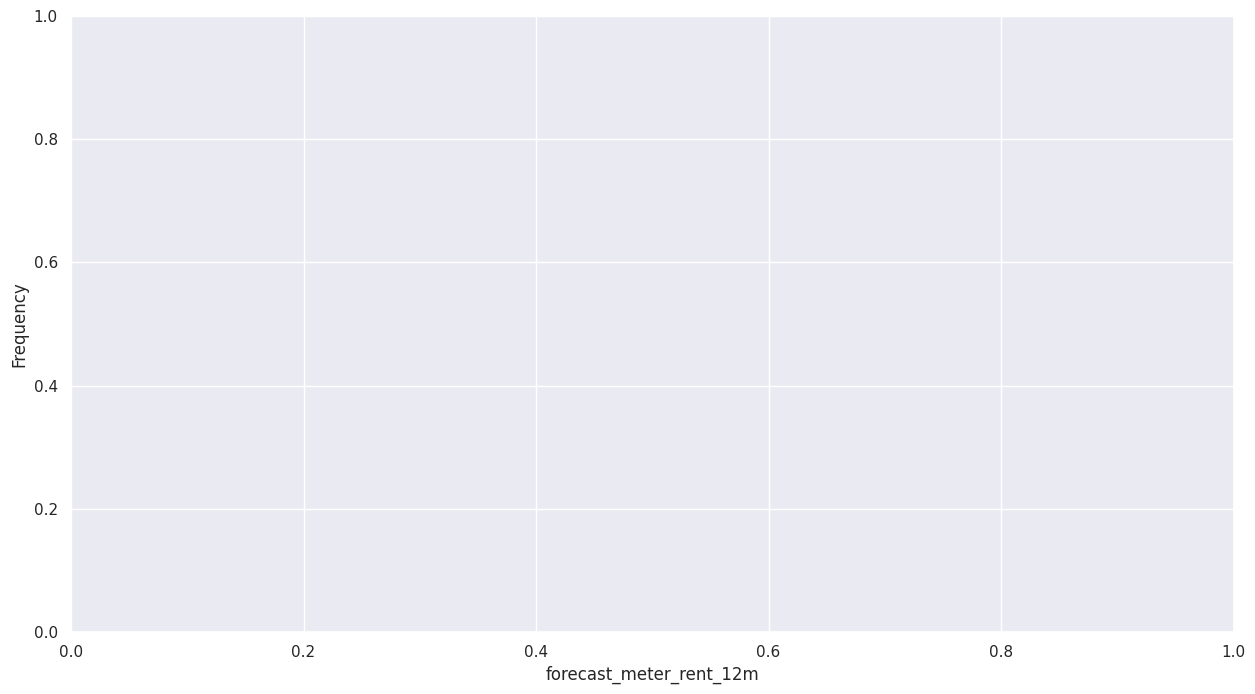

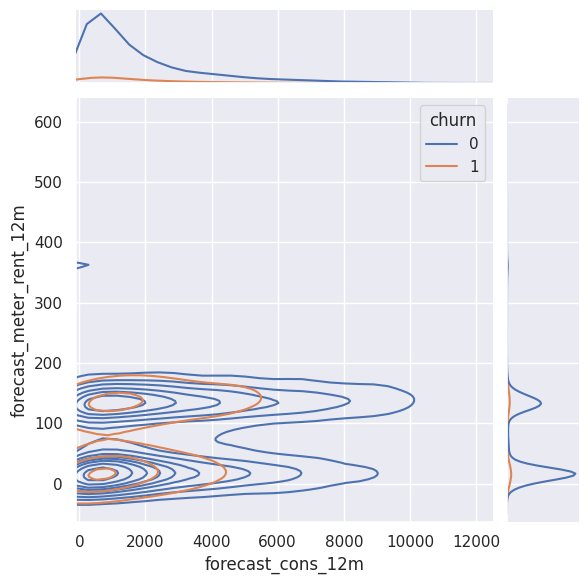

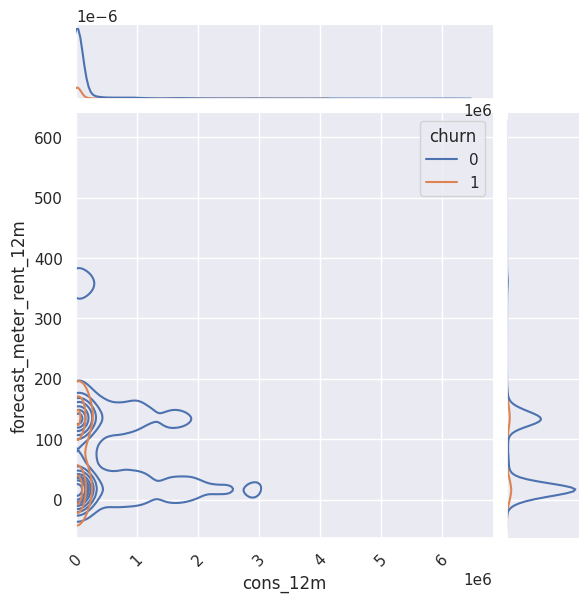

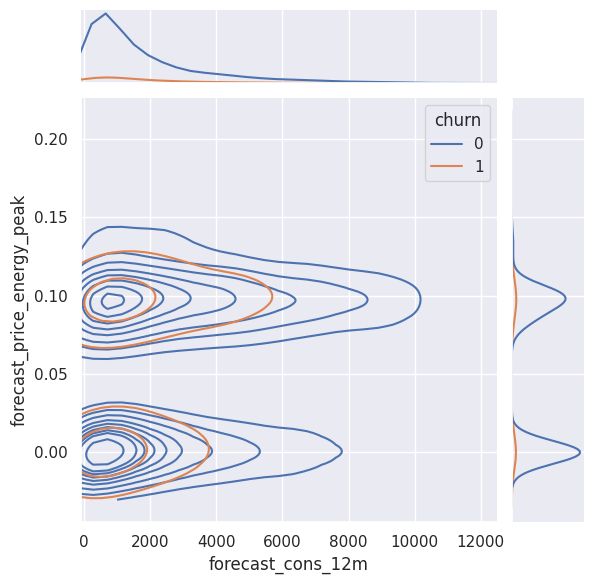

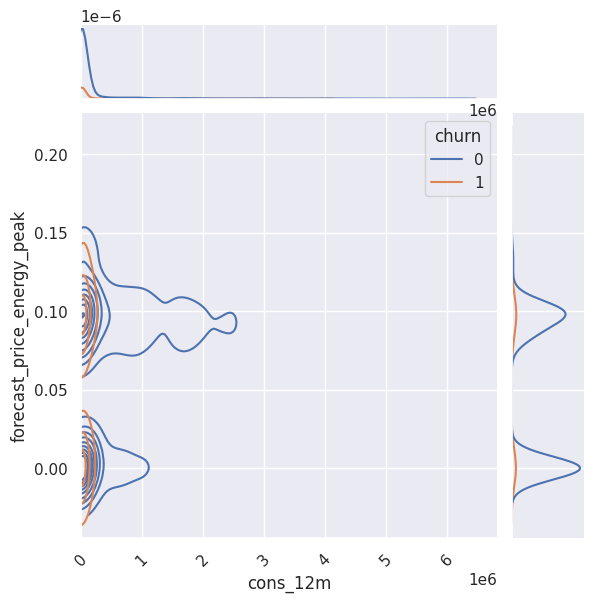

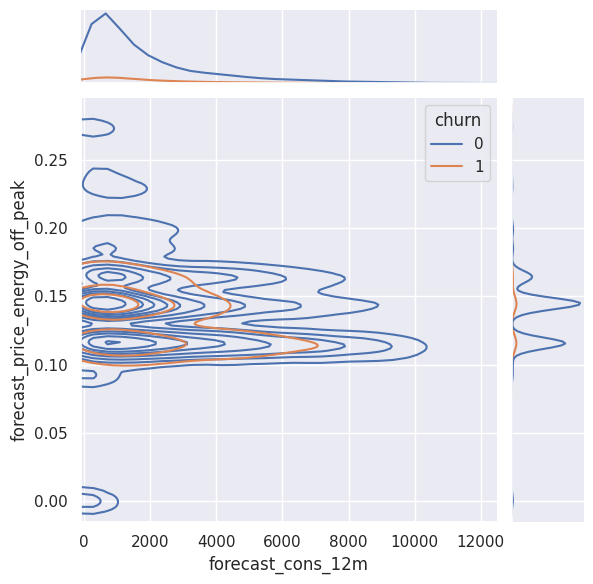

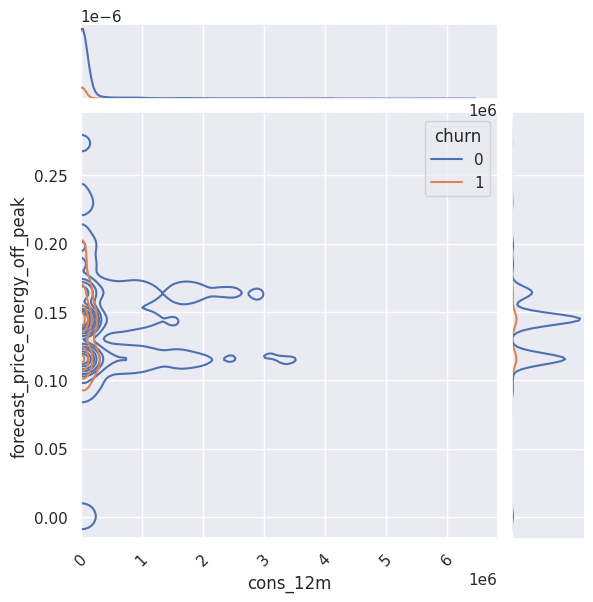

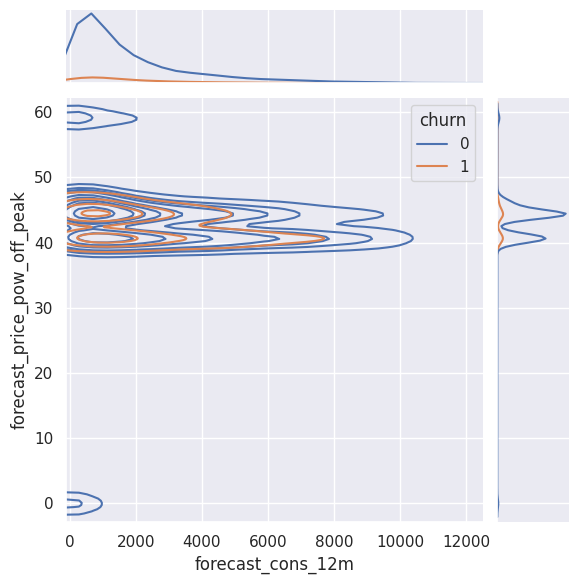

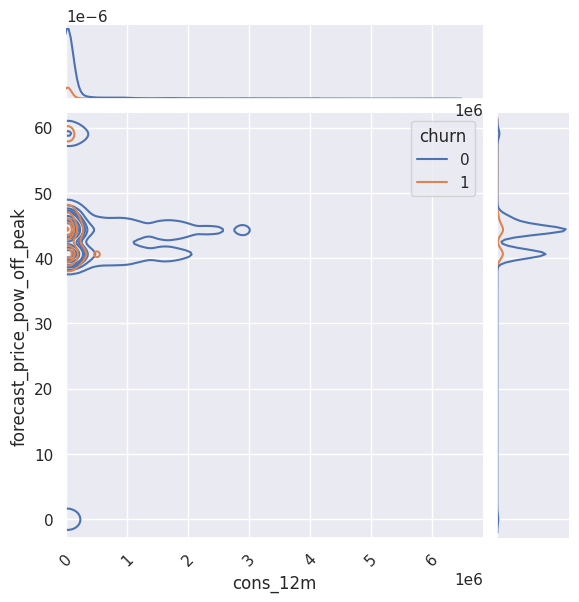

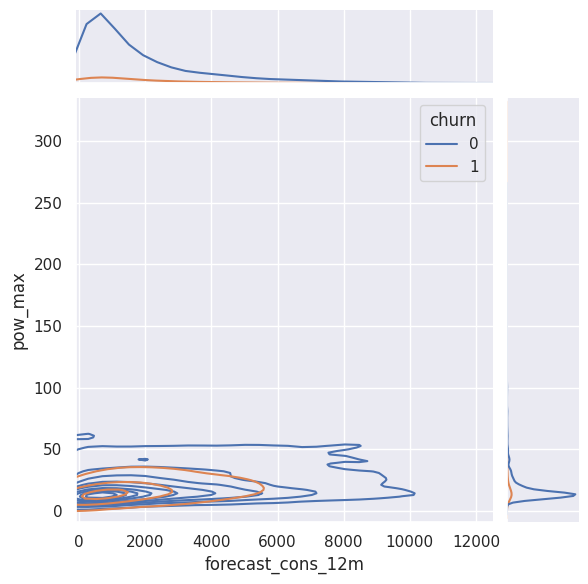

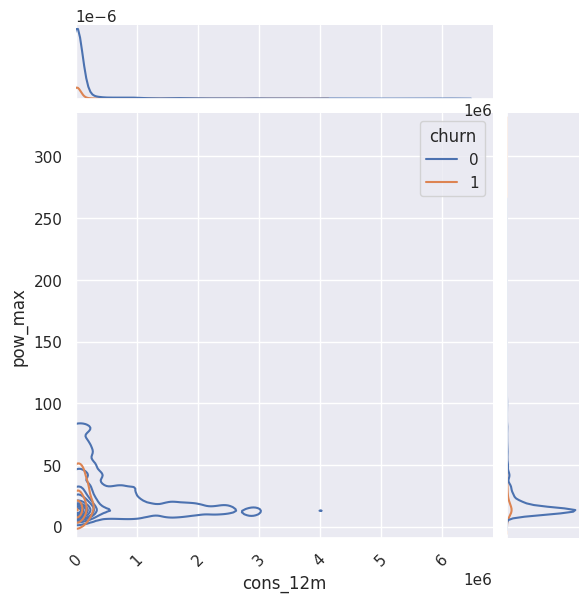

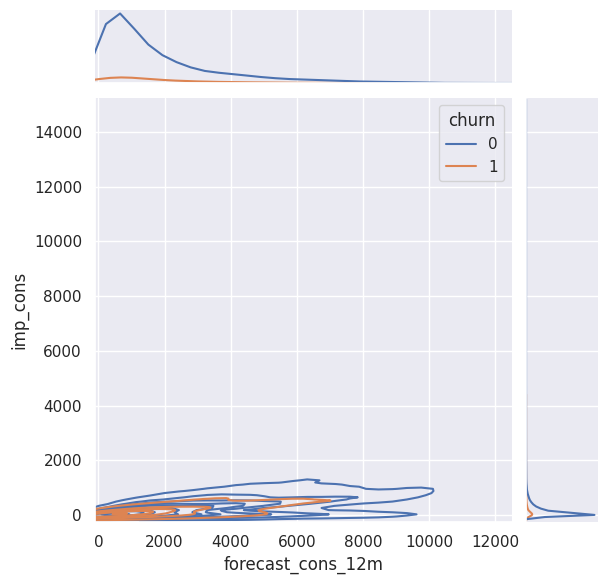

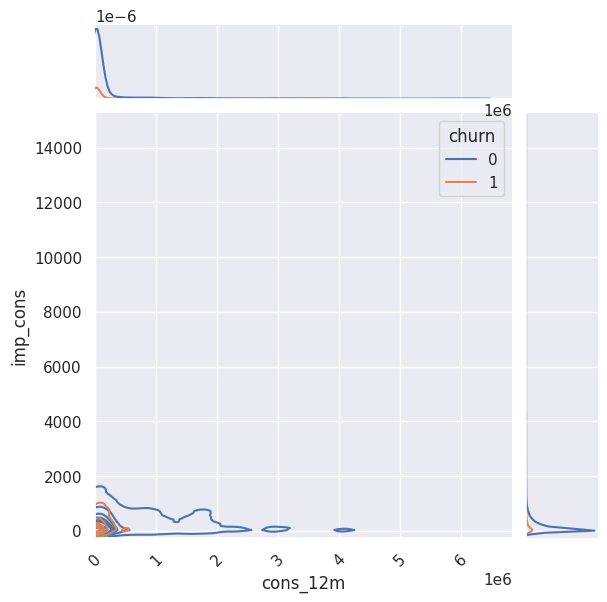

In [20]:
multi_mode_features = ['forecast_meter_rent_12m',
              'forecast_price_energy_peak',
              'forecast_price_energy_off_peak', 
              'forecast_price_pow_off_peak',
              'pow_max',
              'imp_cons']

fig, ax = plt.subplots()
#nrows = 6, ncols=2
#ax.set_xlim(0, 20000)
 
for i in multi_mode_features:
    graph1 = sns.jointplot(data=client, y=i, x= 'forecast_cons_12m', hue ='churn', kind = 'kde', xlim = (-100,12500))
    graph2 = sns.jointplot(data=client, y=i, x= 'cons_12m', hue ='churn', kind = 'kde', xlim =(client['cons_12m'].min()*0.8, client['cons_12m'].max()*1.1))

    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show();

### This is really interesting. The kernel density estimations reveal that the clients who consumed less churned more than the clients who didnt churn. Is underutilization a possible reason for churn?? Or are they underutilizing because of their price sensitivity?? Needs more investigation.



## Let's explore the individual class distributions in numeric features in a quantile boxplot (boxenplot)

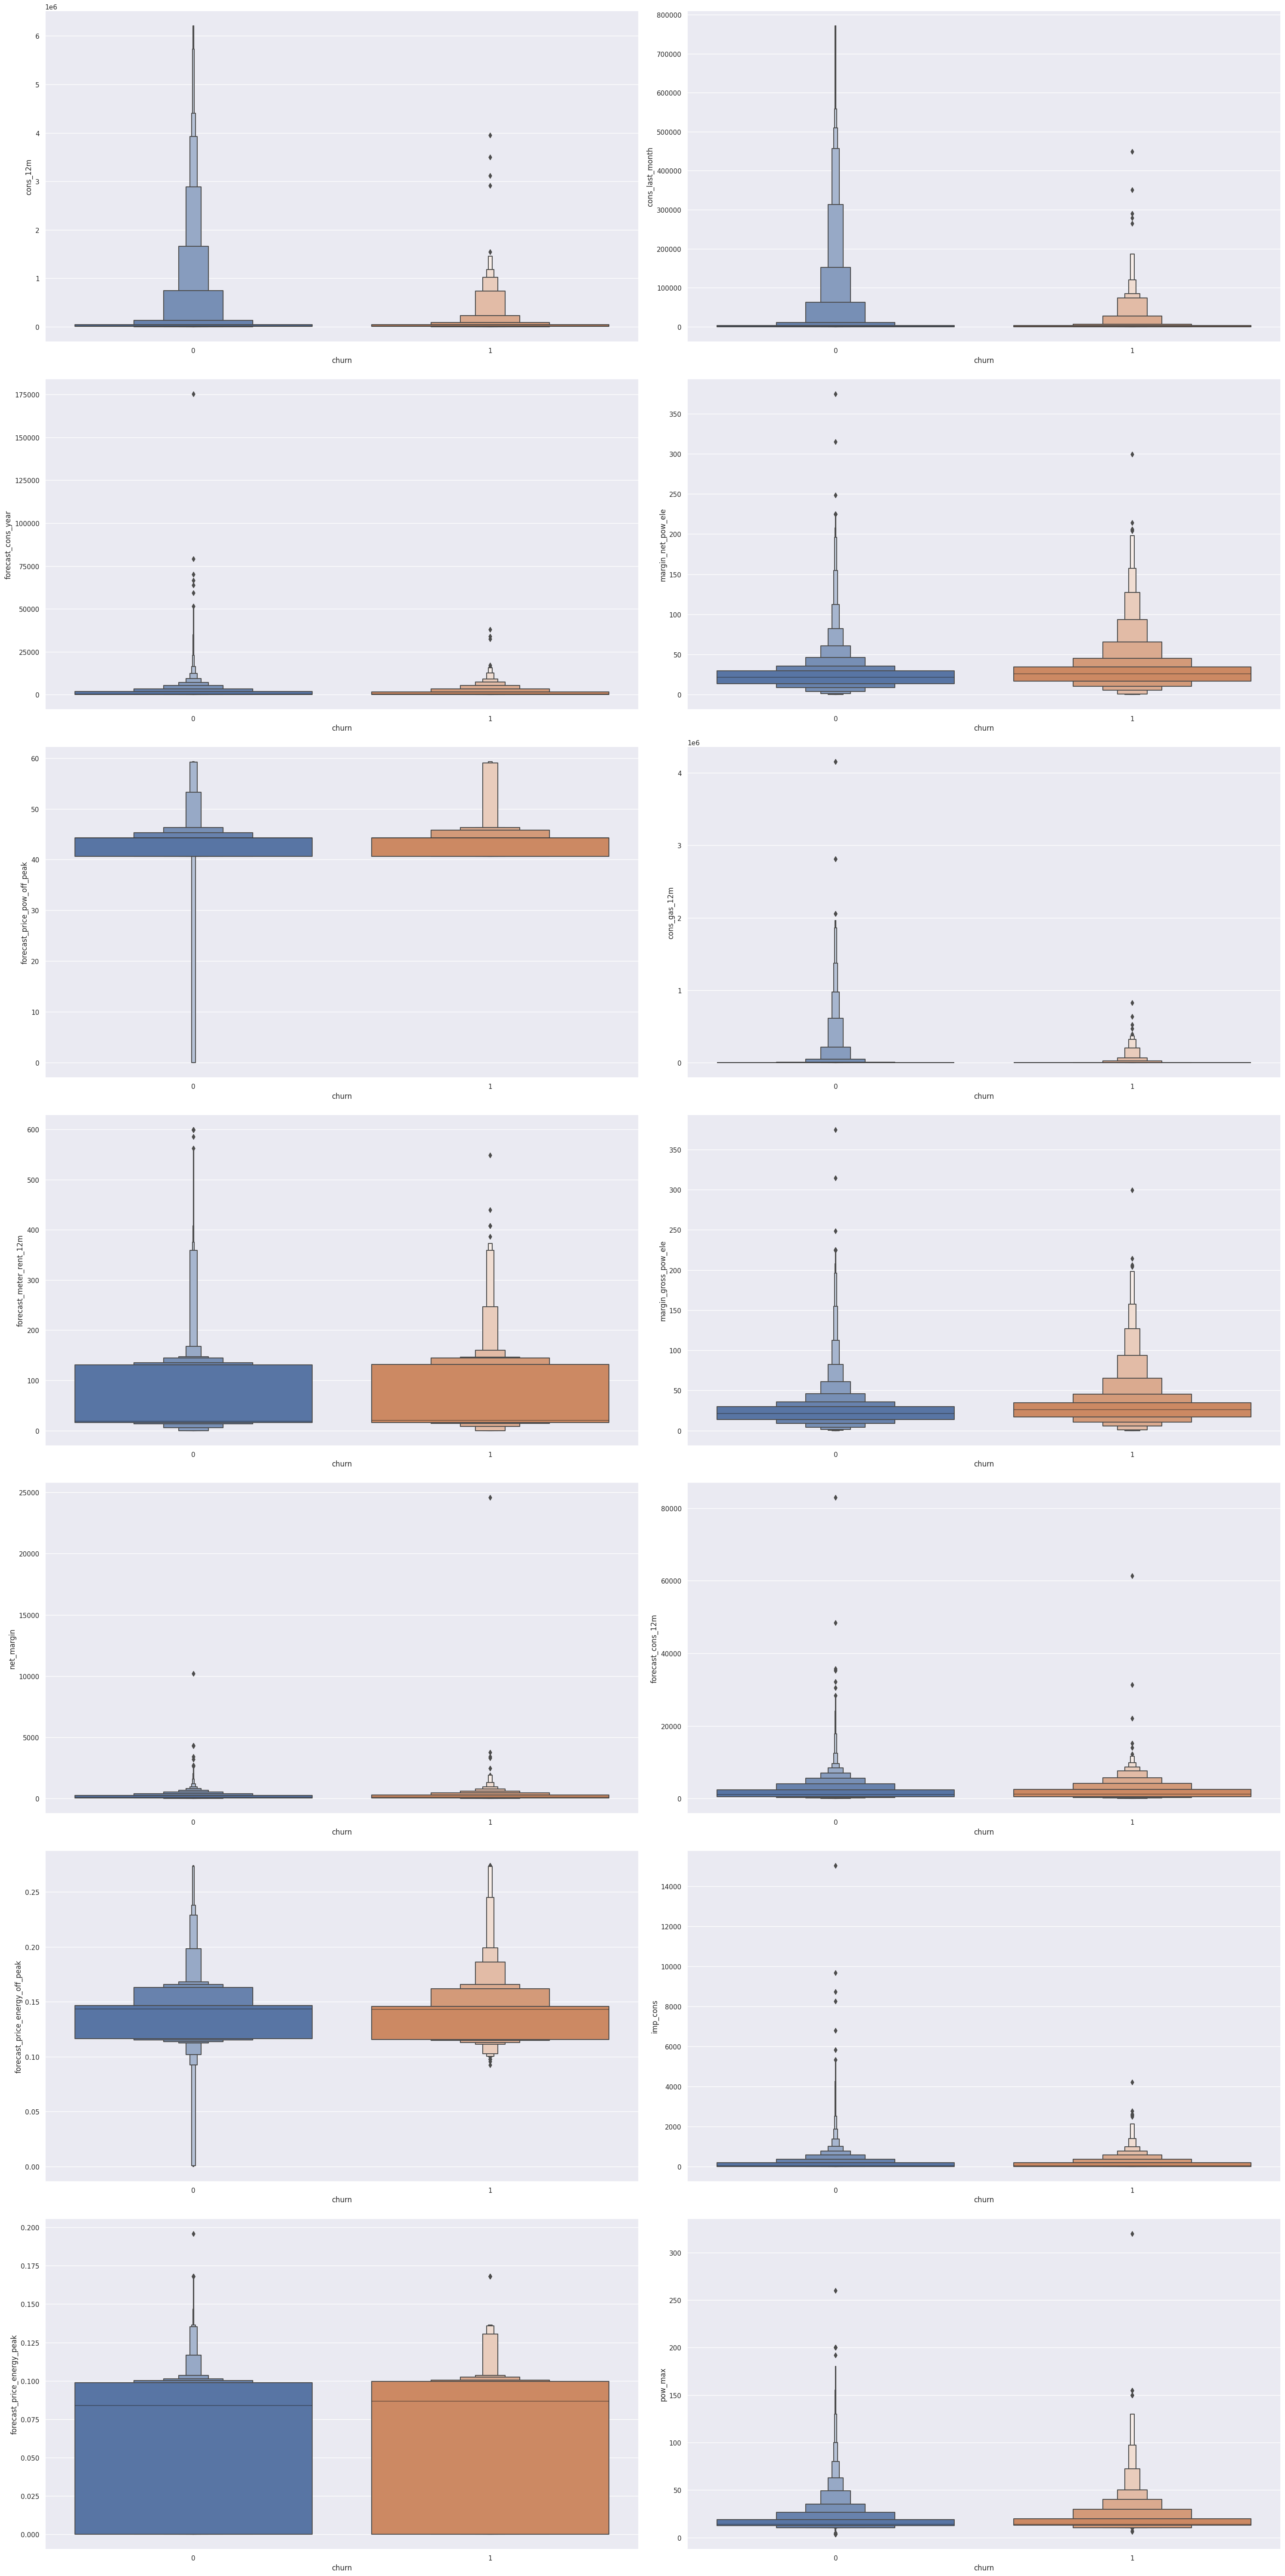

In [26]:
fig,ax=plt.subplots(nrows=7, ncols=2,figsize=(30,60))

for variable, subplot in zip(features_cont,ax.flatten()):
    sns.boxenplot(x=client.churn,y=client_num[variable],ax=subplot)
    plt.ylabel(variable, fontsize=12)
plt.tight_layout()

### There's no clear variability in target class distribitions among the continuous numeric features. Lets Explore the discrete features.

In [41]:
cols

['forecast_discount_energy',
 'nb_prod_act',
 'num_years_antig',
 'contract_start_year_syn',
 'contract_end_year_syn',
 'period_subscribed_syn']

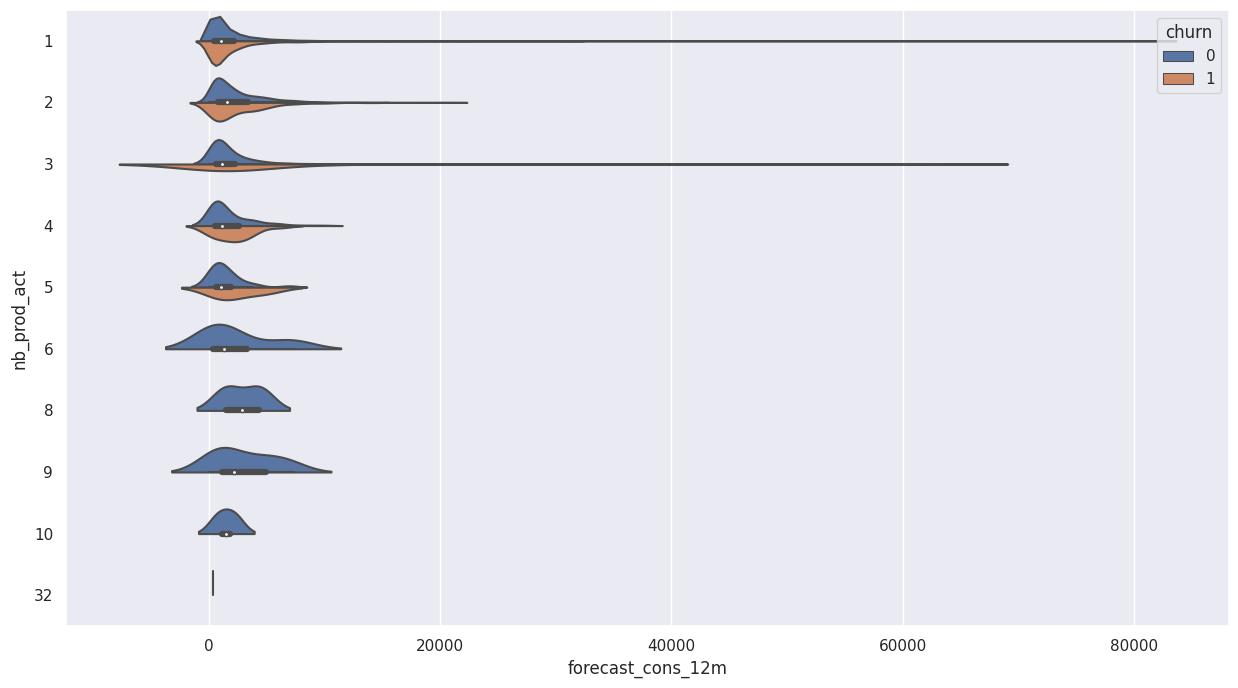

In [62]:
fig, ax = plt.subplots()
sns.violinplot(data=df, y= 'nb_prod_act' , x=client['forecast_cons_12m'], hue = client['churn'], split=True, orient = 'h')
#sns.violinplot(data=df, x= 'nb_prod_act' , y=client['cons_12m'], hue = client['churn'], split=True)
plt.show()

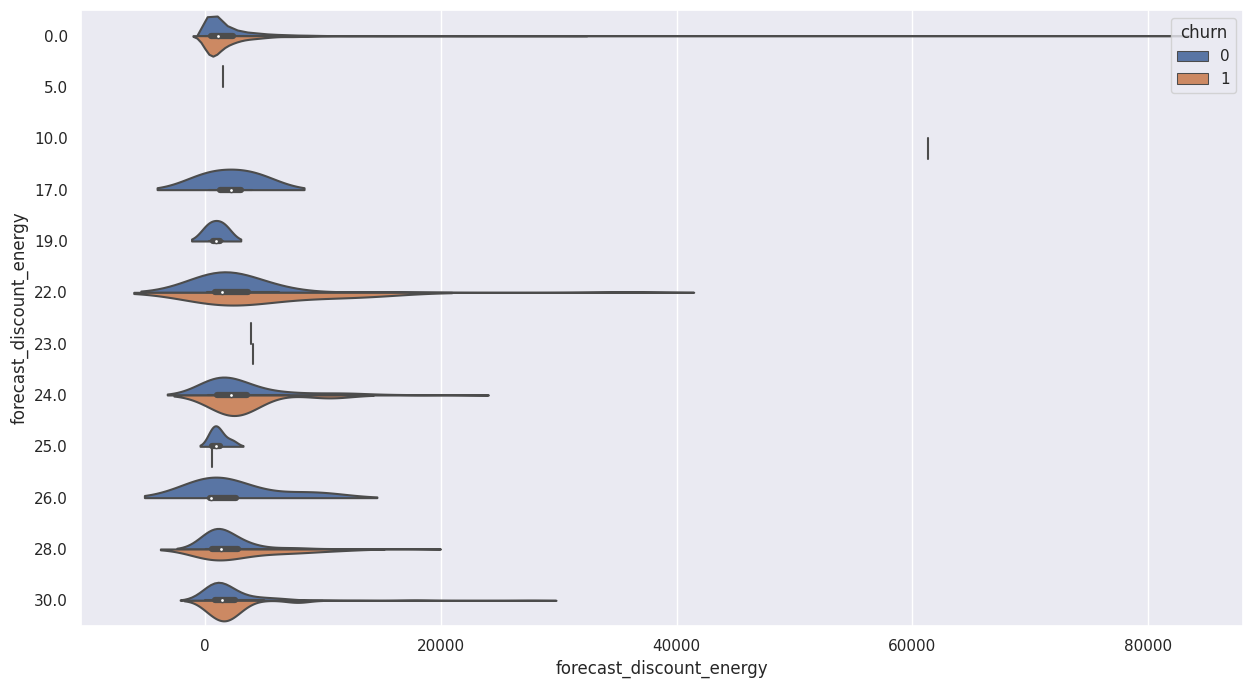

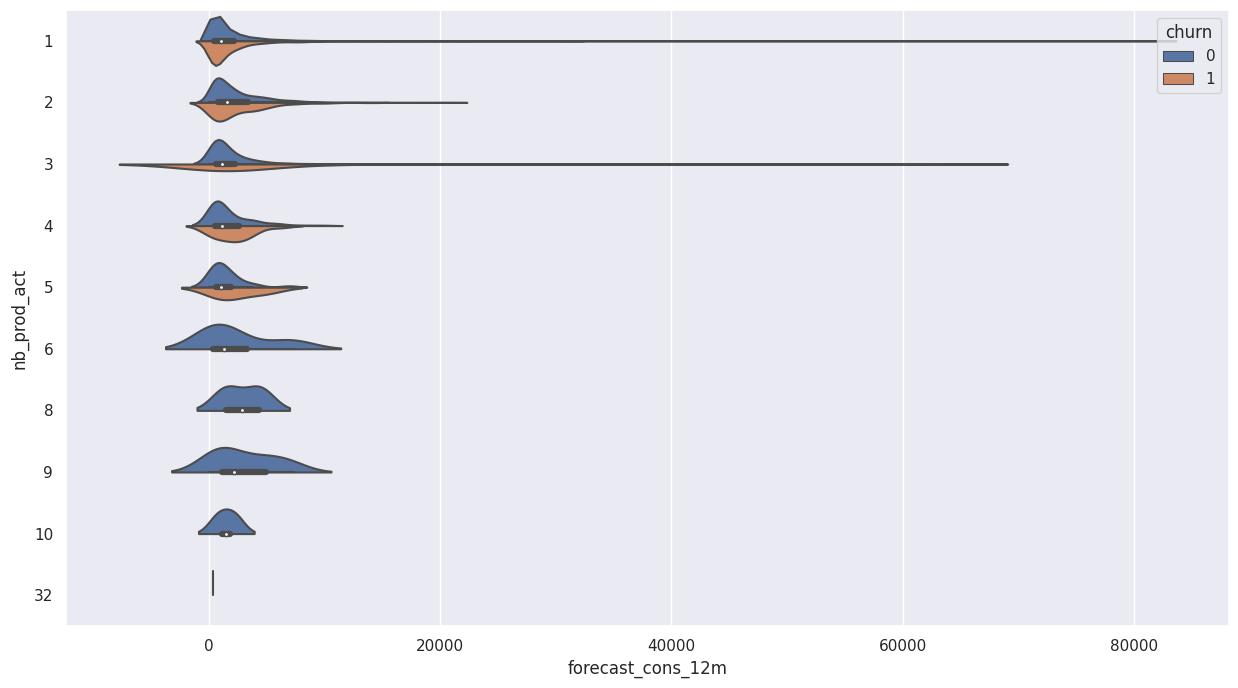

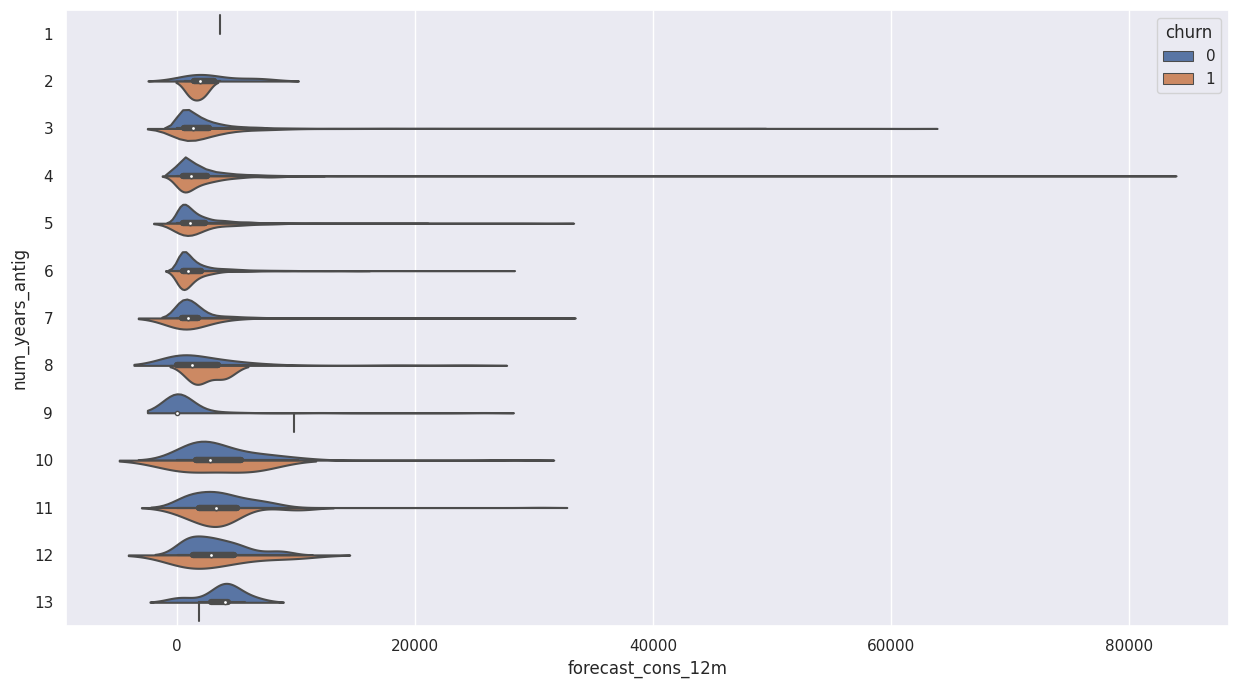

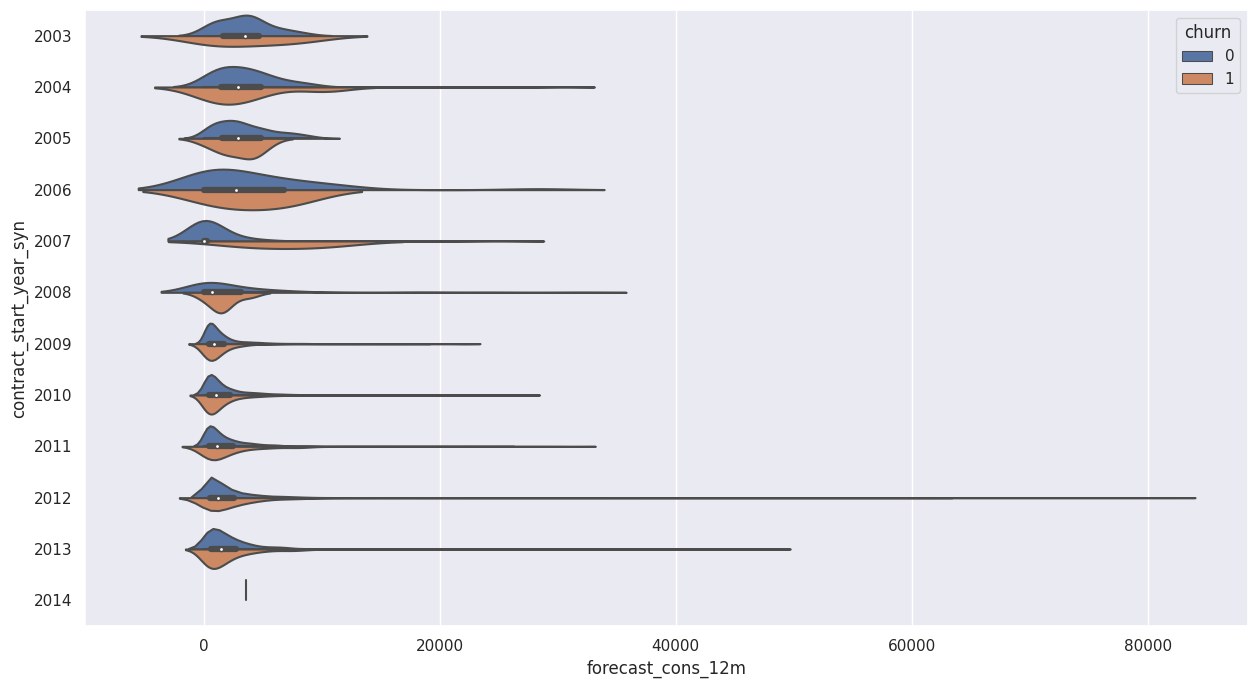

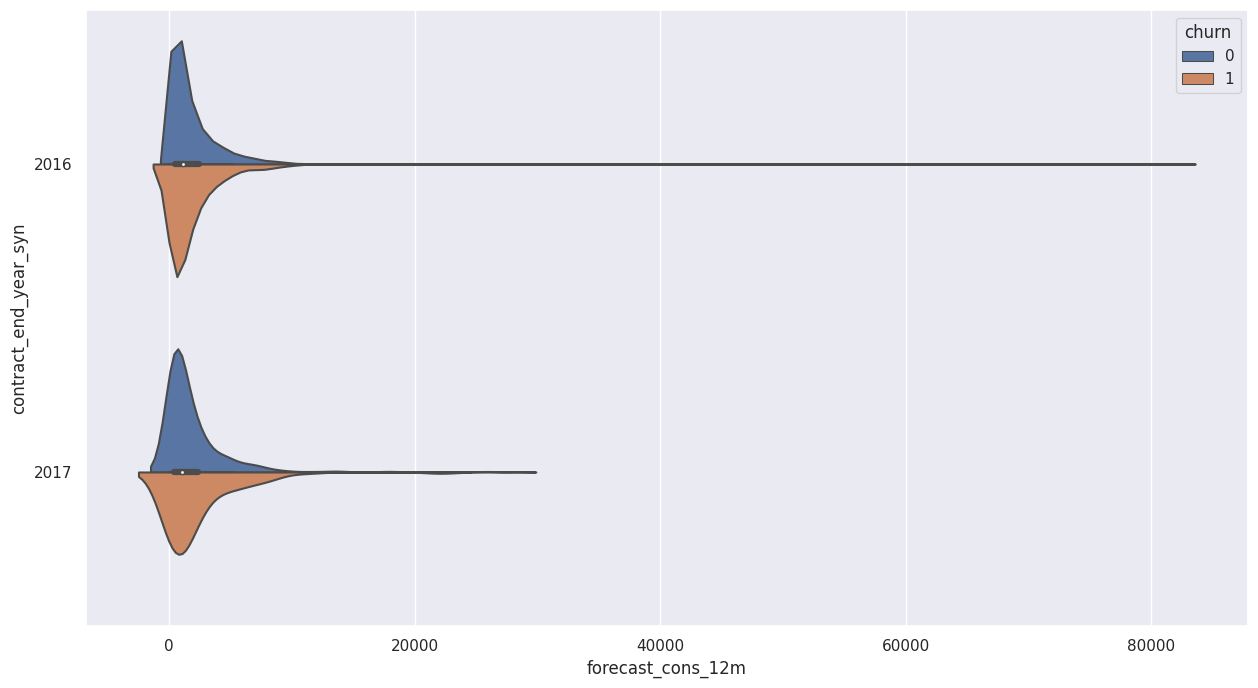

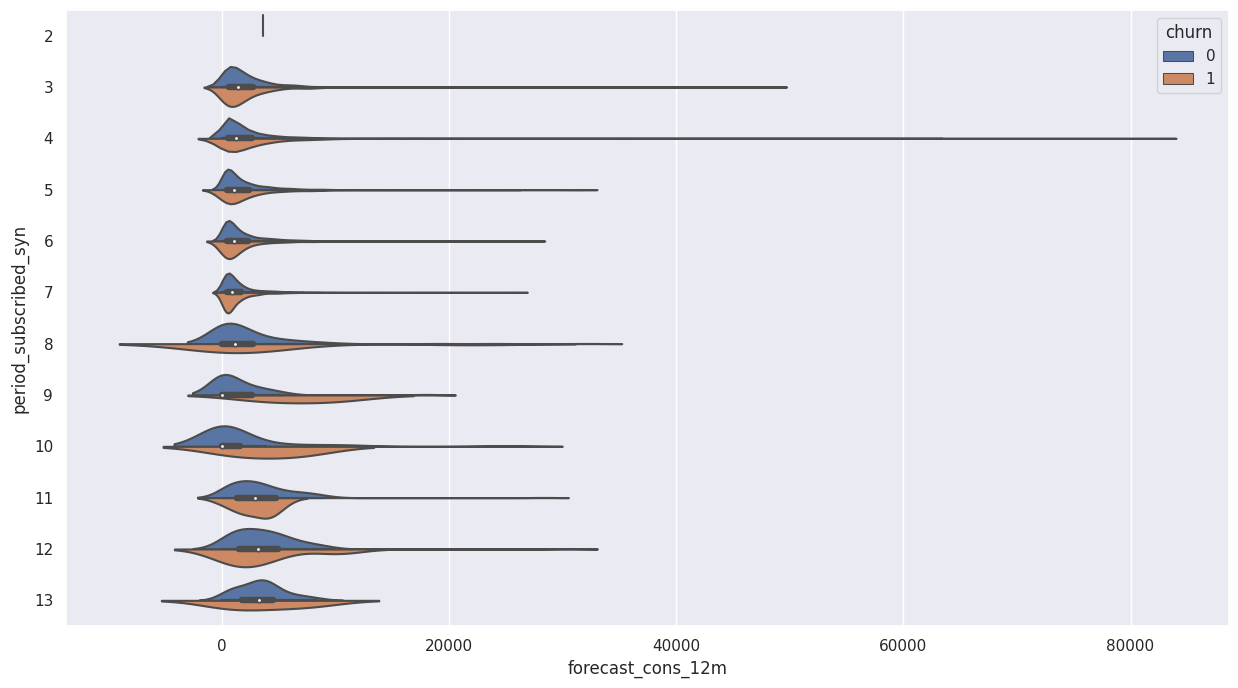

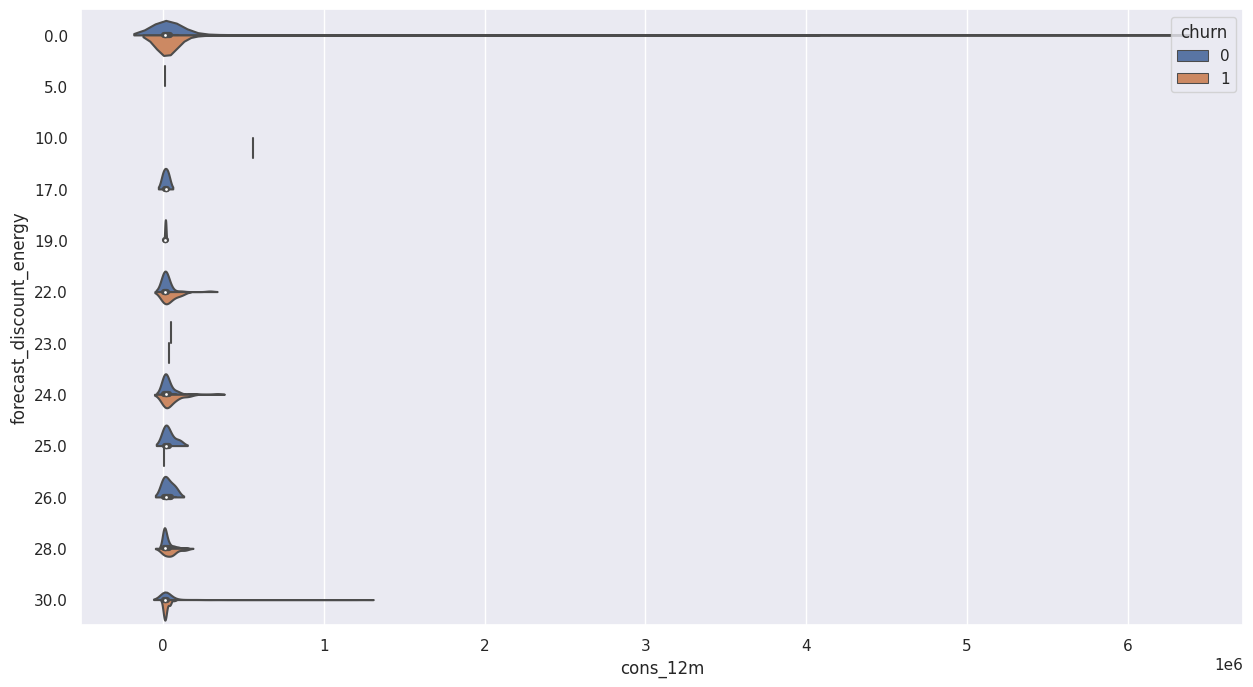

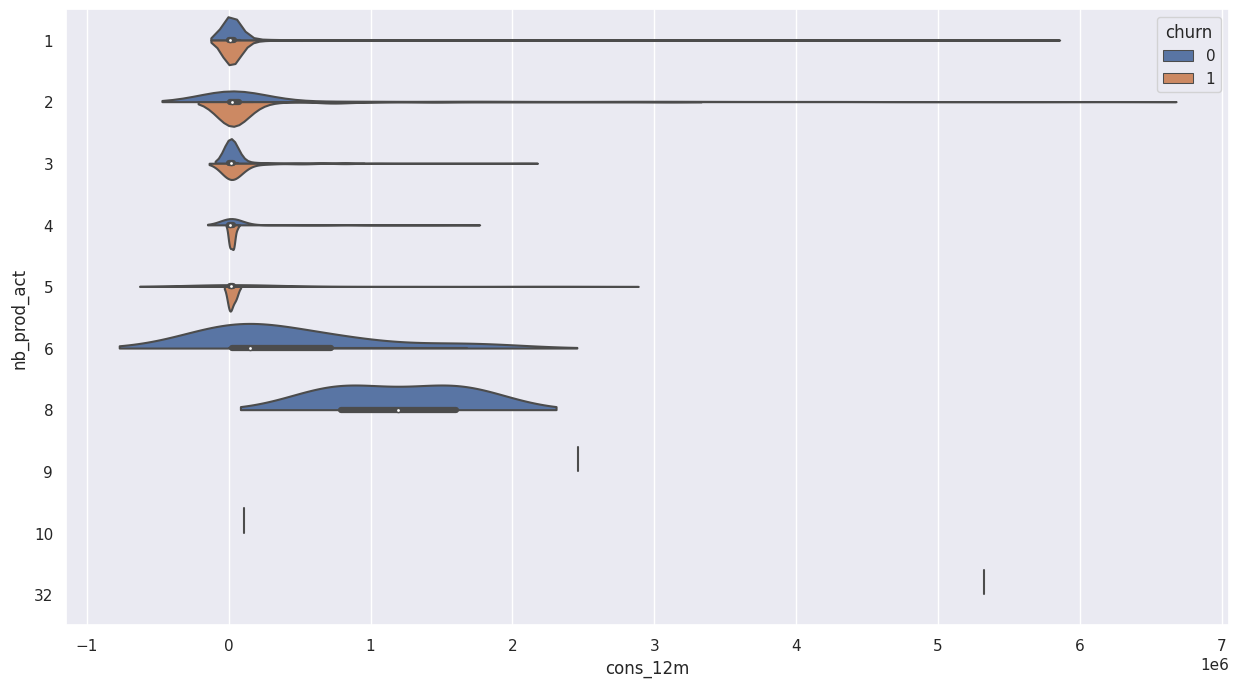

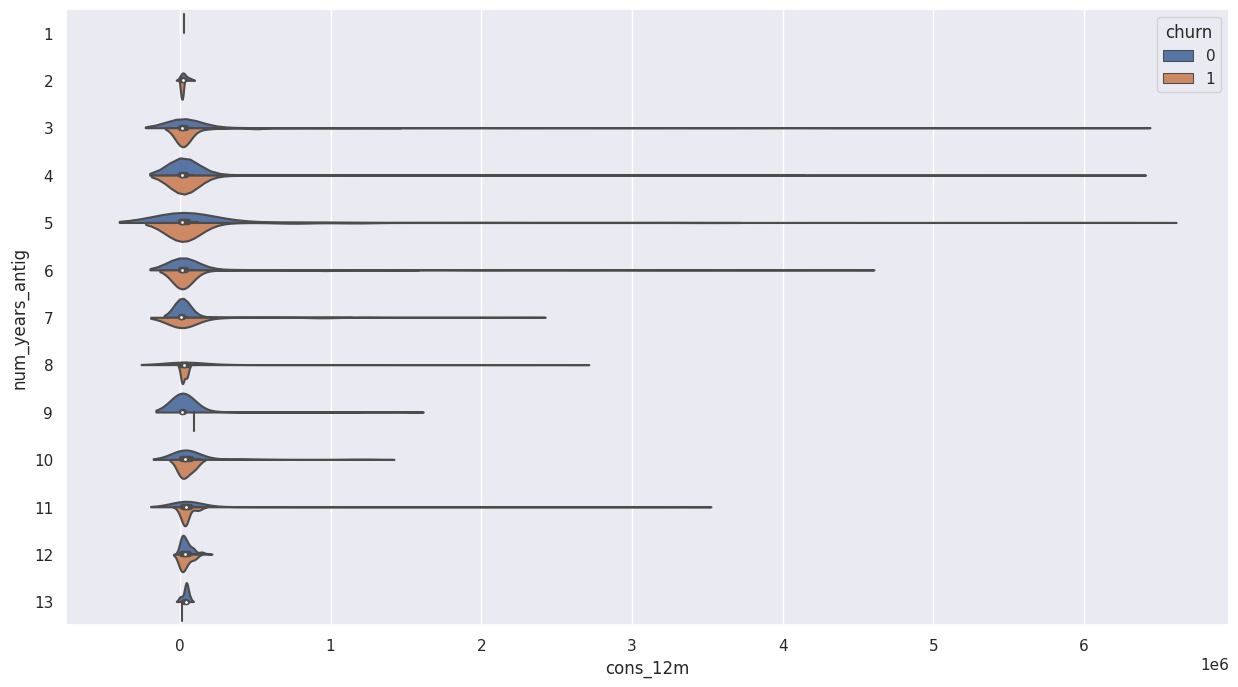

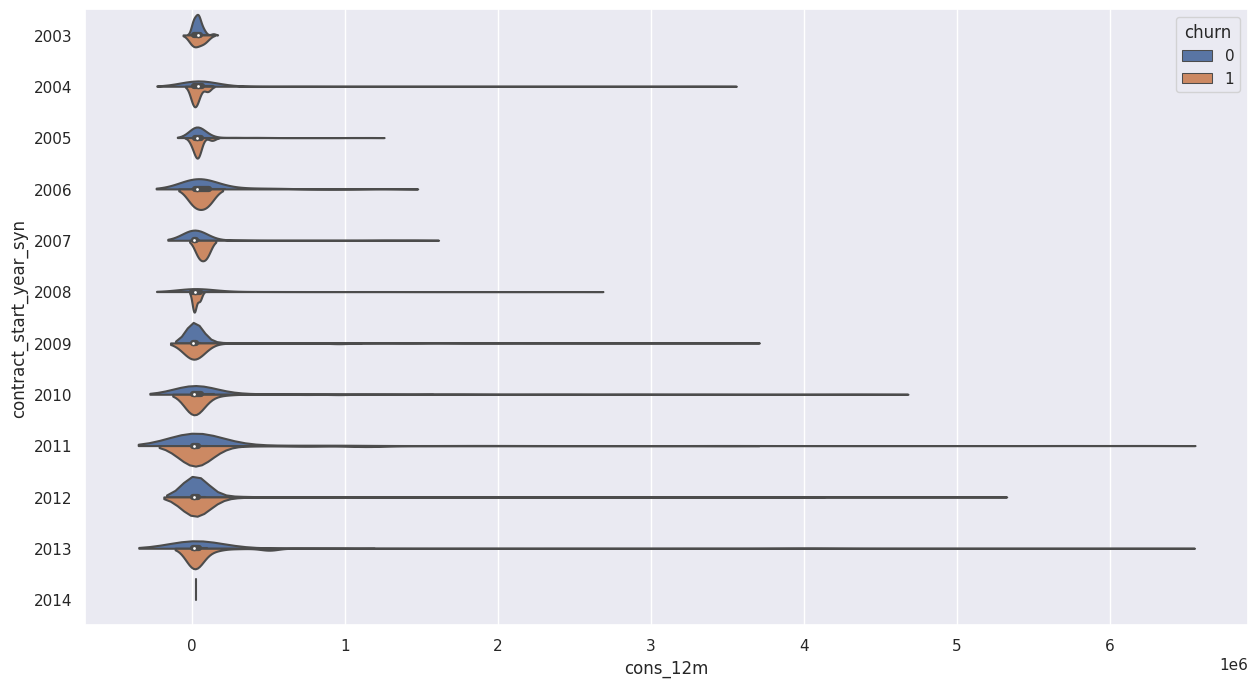

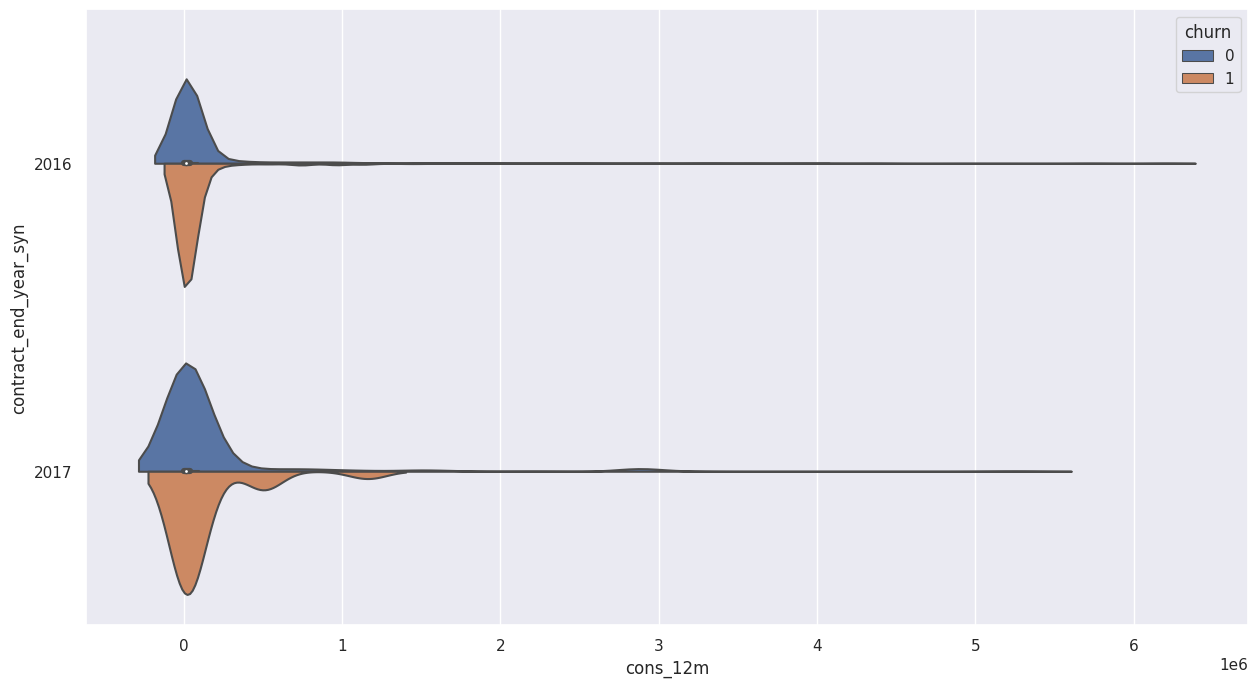

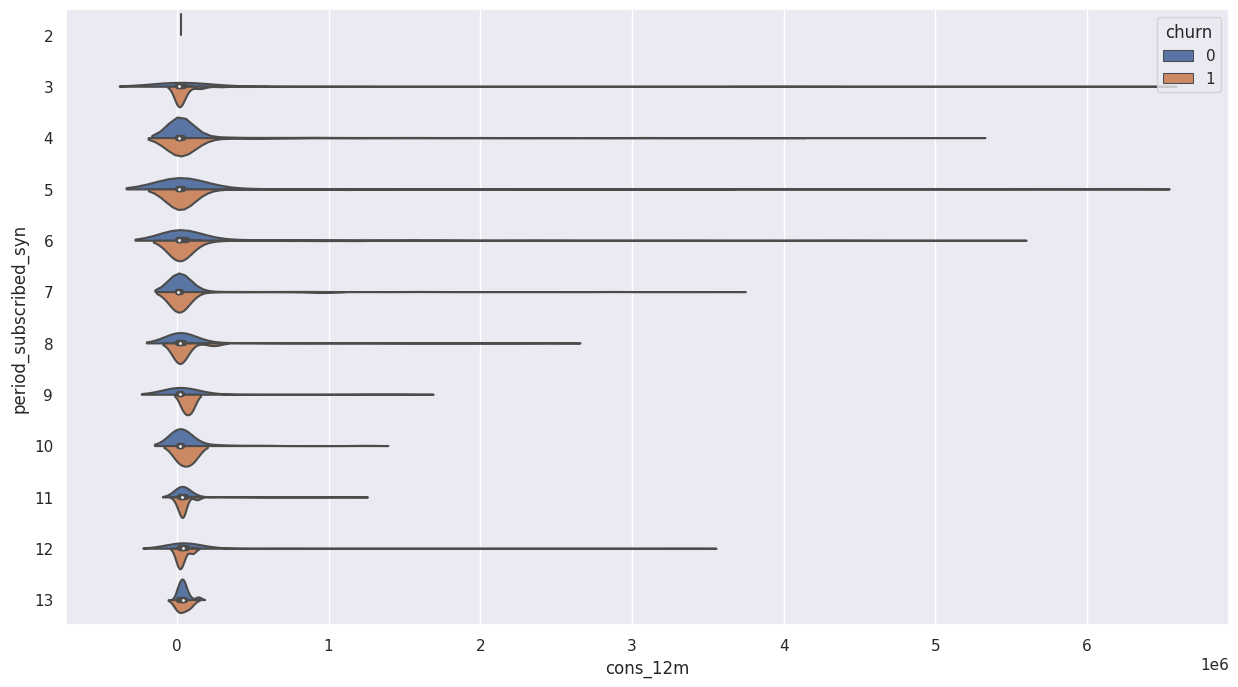

In [64]:
df = client_num_discrete.drop('churn', axis=1)
cols = df.columns.to_list()
fig, ax = plt.subplots()

for feature in cols:
    g1 = sns.violinplot(data=df, y=feature, x=client['forecast_cons_12m'], hue = client['churn'], split=True, orient='h')
    ax.set_xlabel(feature)
    plt.show();
    
for feature in cols:    
    g2 = sns.violinplot(data=df, y=feature, x=client['cons_12m'], hue = client['churn'], split=True, orient = 'h')    
    ax.set_xlabel(feature)
    plt.show();
    
    

## Let's merge client and price datsets to track price changes per customer

In [5]:
merged_data = pd.merge(client, price, on='id', how='inner')

In [6]:
merged_data.head(30)

id                     channel_sales  \
0   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
5   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
6   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
7   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
8   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
9   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
10  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
11  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
12  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
13  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
14  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
15  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
16  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
17  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
18  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
19  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
20  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
21  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
22  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
23  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
24  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
25  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
26  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
27  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
28  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
29  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

    cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0          0         54946                0  2013-06-15  2016-06-15   
1          0         54946                0  2013-06-15  2016-06-15   
2          0         54946                0  2013-06-15  2016-06-15   
3          0         54946                0  2013-06-15  2016-06-15   
4          0         54946                0  2013-06-15  2016-06-15   
5          0         54946                0  2013-06-15  2016-06-15   
6          0         54946                0  2013-06-15  2016-06-15   
7          0         54946                0  2013-06-15  2016-06-15   
8          0         54946                0  2013-06-15  2016-06-15   
9          0         54946                0  2013-06-15  2016-06-15   
10         0         54946                0  2013-06-15  2016-06-15   
11         0         54946                0  2013-06-15  2016-06-15   
12      4660             0                0  2009-08-21  2016-08-30   
13      4660             0                0  2009-08-21  2016-08-30   
14      4660             0                0  2009-08-21  2016-08-30   
15      4660             0                0  2009-08-21  2016-08-30   
16      4660             0                0  2009-08-21  2016-08-30   
17      4660             0                0  2009-08-21  2016-08-30   
18      4660             0                0  2009-08-21  2016-08-30   
19      4660             0                0  2009-08-21  2016-08-30   
20      4660             0                0  2009-08-21  2016-08-30   
21      4660             0                0  2009-08-21  2016-08-30   
22      4660             0                0  2009-08-21  2016-08-30   
23      4660             0         

In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

## These features - channel_sales , origin_up, has_gas are nominal. So we will encode them.

In [23]:
a, b = client.channel_sales.unique(), client.origin_up.unique()

replace_dict = {**{i:i[:5] for i in a},
                 **{i:i[:5] for i in b}} ## concat dictionaries
replace_dict

{'foosdfpfkusacimwkcsosbicdxkicaua': 'foosd',
 'MISSING': 'MISSI',
 'lmkebamcaaclubfxadlmueccxoimlema': 'lmkeb',
 'usilxuppasemubllopkaafesmlibmsdf': 'usilx',
 'ewpakwlliwisiwduibdlfmalxowmwpci': 'ewpak',
 'epumfxlbckeskwekxbiuasklxalciiuu': 'epumf',
 'sddiedcslfslkckwlfkdpoeeailfpeds': 'sddie',
 'fixdbufsefwooaasfcxdxadsiekoceaa': 'fixdb',
 'lxidpiddsbxsbosboudacockeimpuepw': 'lxidp',
 'kamkkxfxxuwbdslkwifmmcsiusiuosws': 'kamkk',
 'ldkssxwpmemidmecebumciepifcamkci': 'ldkss',
 'usapbepcfoloekilkwsdiboslwaxobdp': 'usapb',
 'ewxeelcelemmiwuafmddpobolfuxioce': 'ewxee'}

In [24]:
## one hot encoding
merged_data = merged_data.replace(replace_dict)
merged_data = pd.get_dummies(merged_data, columns=['channel_sales' , 'origin_up'])

## label encoding 
has_gas_encoder = LabelEncoder()
merged_data['has_gas'] = has_gas_encoder.fit_transform(merged_data['has_gas']) #t=1, f=0

In [25]:
merged_df = merged_data.copy()
#id_encoder = LabelEncoder()
#merged_df['id'] = id_encoder.fit_transform(merged_df['id'])

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   cons_12m                        175149 non-null  int64         
 2   cons_gas_12m                    175149 non-null  int64         
 3   cons_last_month                 175149 non-null  int64         
 4   date_activ                      175149 non-null  datetime64[ns]
 5   date_end                        175149 non-null  datetime64[ns]
 6   date_modif_prod                 175149 non-null  datetime64[ns]
 7   date_renewal                    175149 non-null  datetime64[ns]
 8   forecast_cons_12m               175149 non-null  float64       
 9   forecast_cons_year              175149 non-null  int64         
 10  forecast_discount_energy        175149 non-null  float64

## **Price Sensitivity and Churn**
#### Now would be a good stage to define price sensitivity of customers. The price sensitivity is a measure of the customer's willingness to pay an additional unit of good/service at a certain price point. In other words, its a measure of change of customer's purchasing behaviour ata certain price.

#### Price Sensitivity is influenced by various factors: Sanjeev.kumar@ma.iitr.ac.in
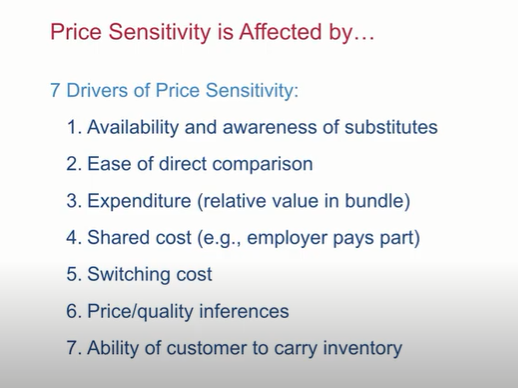

As the **Law of Diminishing Demand** states, the demand for a (normal) good decreases with increase in price. Here's an [article](https://www.investopedia.com/terms/p/priceelasticity.asp#:~:text=is%20quite%20elastic.-,What%20is%20price%20elasticity%20of%20demand%3F,when%20a%20product's%20price%20changes.) for better understanding. Demand curves are downward sloping in microeconomic models since each additional unit of a good or service is put toward a less valuable use.

**Inelastic demand** of a good/service implies there is **no significant % change in demand with change in price. And in this case, client does not churn.**

**Elastic demand** of a good/service implies there is **significant % change in demand with change in price. Here, the client churns.** The price threshold for churn is the price above which the customer churns.

One of our tasks in this step of the challenge would be to come up with definition for this price sensitivity for a client. We will deal with this later in this notebook.

We have our demand/consumption details in place. So let's test the validity of the Law of Demand for the utilities of gas and electricity supply. Price sensitivity/elasticity of demand is defined as **(change in demand/original demand)/(change in price/old price)**

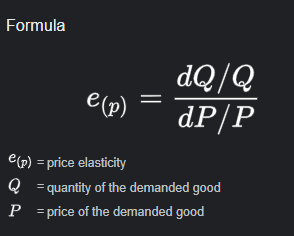


Demand curves are downward sloping in microeconomic models since each additional unit of a good or service is put toward a less valuable use.

In [27]:
## grouping columns for ease
id = 'id'
cons = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 
        'forecast_cons_12m', 'forecast_cons_year',  'pow_max']
dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'contract_start_year', 'contract_end_year']       
forecast = ['forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak'], 
has_gas = 'has_gas',
churn = 'churn'
current_consumption = 'imp_cons' 
profit_margins = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin'] 
num_products = 'nb_prod_act',
aging =[ 'num_years_antig', 'period_subscribed'] 
campaign = 'origin_up',
price_features = ['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'total_price']

In [28]:
merged_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
2  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
3  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
4  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
1 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
2 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
3 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
4 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                     0.000                    1.780   
1                   0                     0.000                    1.780   
2                   0                     0.000                    1.780   
3                   0                     0.000                    1.780   
4                   0                     0.000                    1.780   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                           0.114                       0.098   
1                           0.114                       0.098   
2                           0.114                       0.098   
3                           0.114                       0.098   
4                           0.114                       0.098   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                       40.607        1     0.000                25.440   
1                       40.607        1     0.000                25.440   
2                       40.607        1     0.000                25.440   
3                       40.607        1     0.000                25.440   
4                       40.607        1     0.000                25.440   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0              25.440            2     678.990                3   43.648   
1              25.440            2     678.990                3   43.648   
2              25.440            2     678.990                3   43.648   
3              25.440            2     678.990                3   43.648   
4              25.440            2     678.990                3   43.648   

   churn  contract_start_year_syn  contract_end_year_syn  \
0      1                     2013                   2016   
1      1                     2013                   2016   
2      1                     2013                   2016   
3      1                     2013                   2016   
4      1                     2013                   2016   

   period_subscribed_syn price_date  price_off_peak_var  price_peak_var  \
0                      3 2015-01-01               0.126           0.103   
1                      3 2015-02-01               0.126           0.103   
2                      3 2015-03-01               0.126           0.103   
3                      3 2015-04-01               0.126           0.103   
4                      3 2015-05-01               0.126           0.103   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  \
0               0.072              40.566          24.340              16.226   
1               0.072              40.566          24.340              16.226   
2               0.072              40.566          24.340              16.226   
3               0.072              40.566          24.340              16.226   
4               0.072              40.566          24.340              16.226   

   fixed_price_component  var_price_component 

## This is interesting. The billing schedule from the price dataset gave us the price changes but not the corresponding shifts in monthly consumption levels. We would need this information from PowerCo to safely estimate price sensitivity of their customers.

# We will still go ahead and explore the features to gather more insights.
I'll define a method to visualize the correlation matrix and use Spearman's rank-order correlation check for monotonicity between different features.

In [29]:
def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 16, annot_size=18, annot_kws=14):
    mask = np.triu(np.ones_like(df.corr(method=method,numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.1f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)
    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

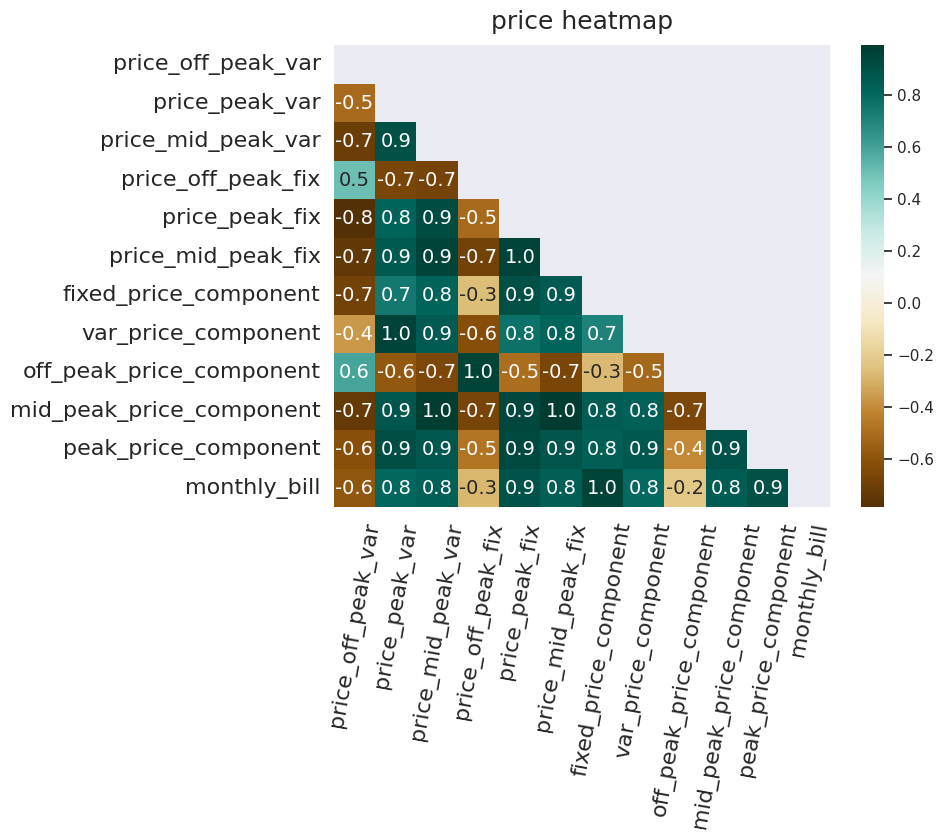

In [30]:
plt.figure(figsize=(8, 6))
corr_map(price, 'price heatmap')

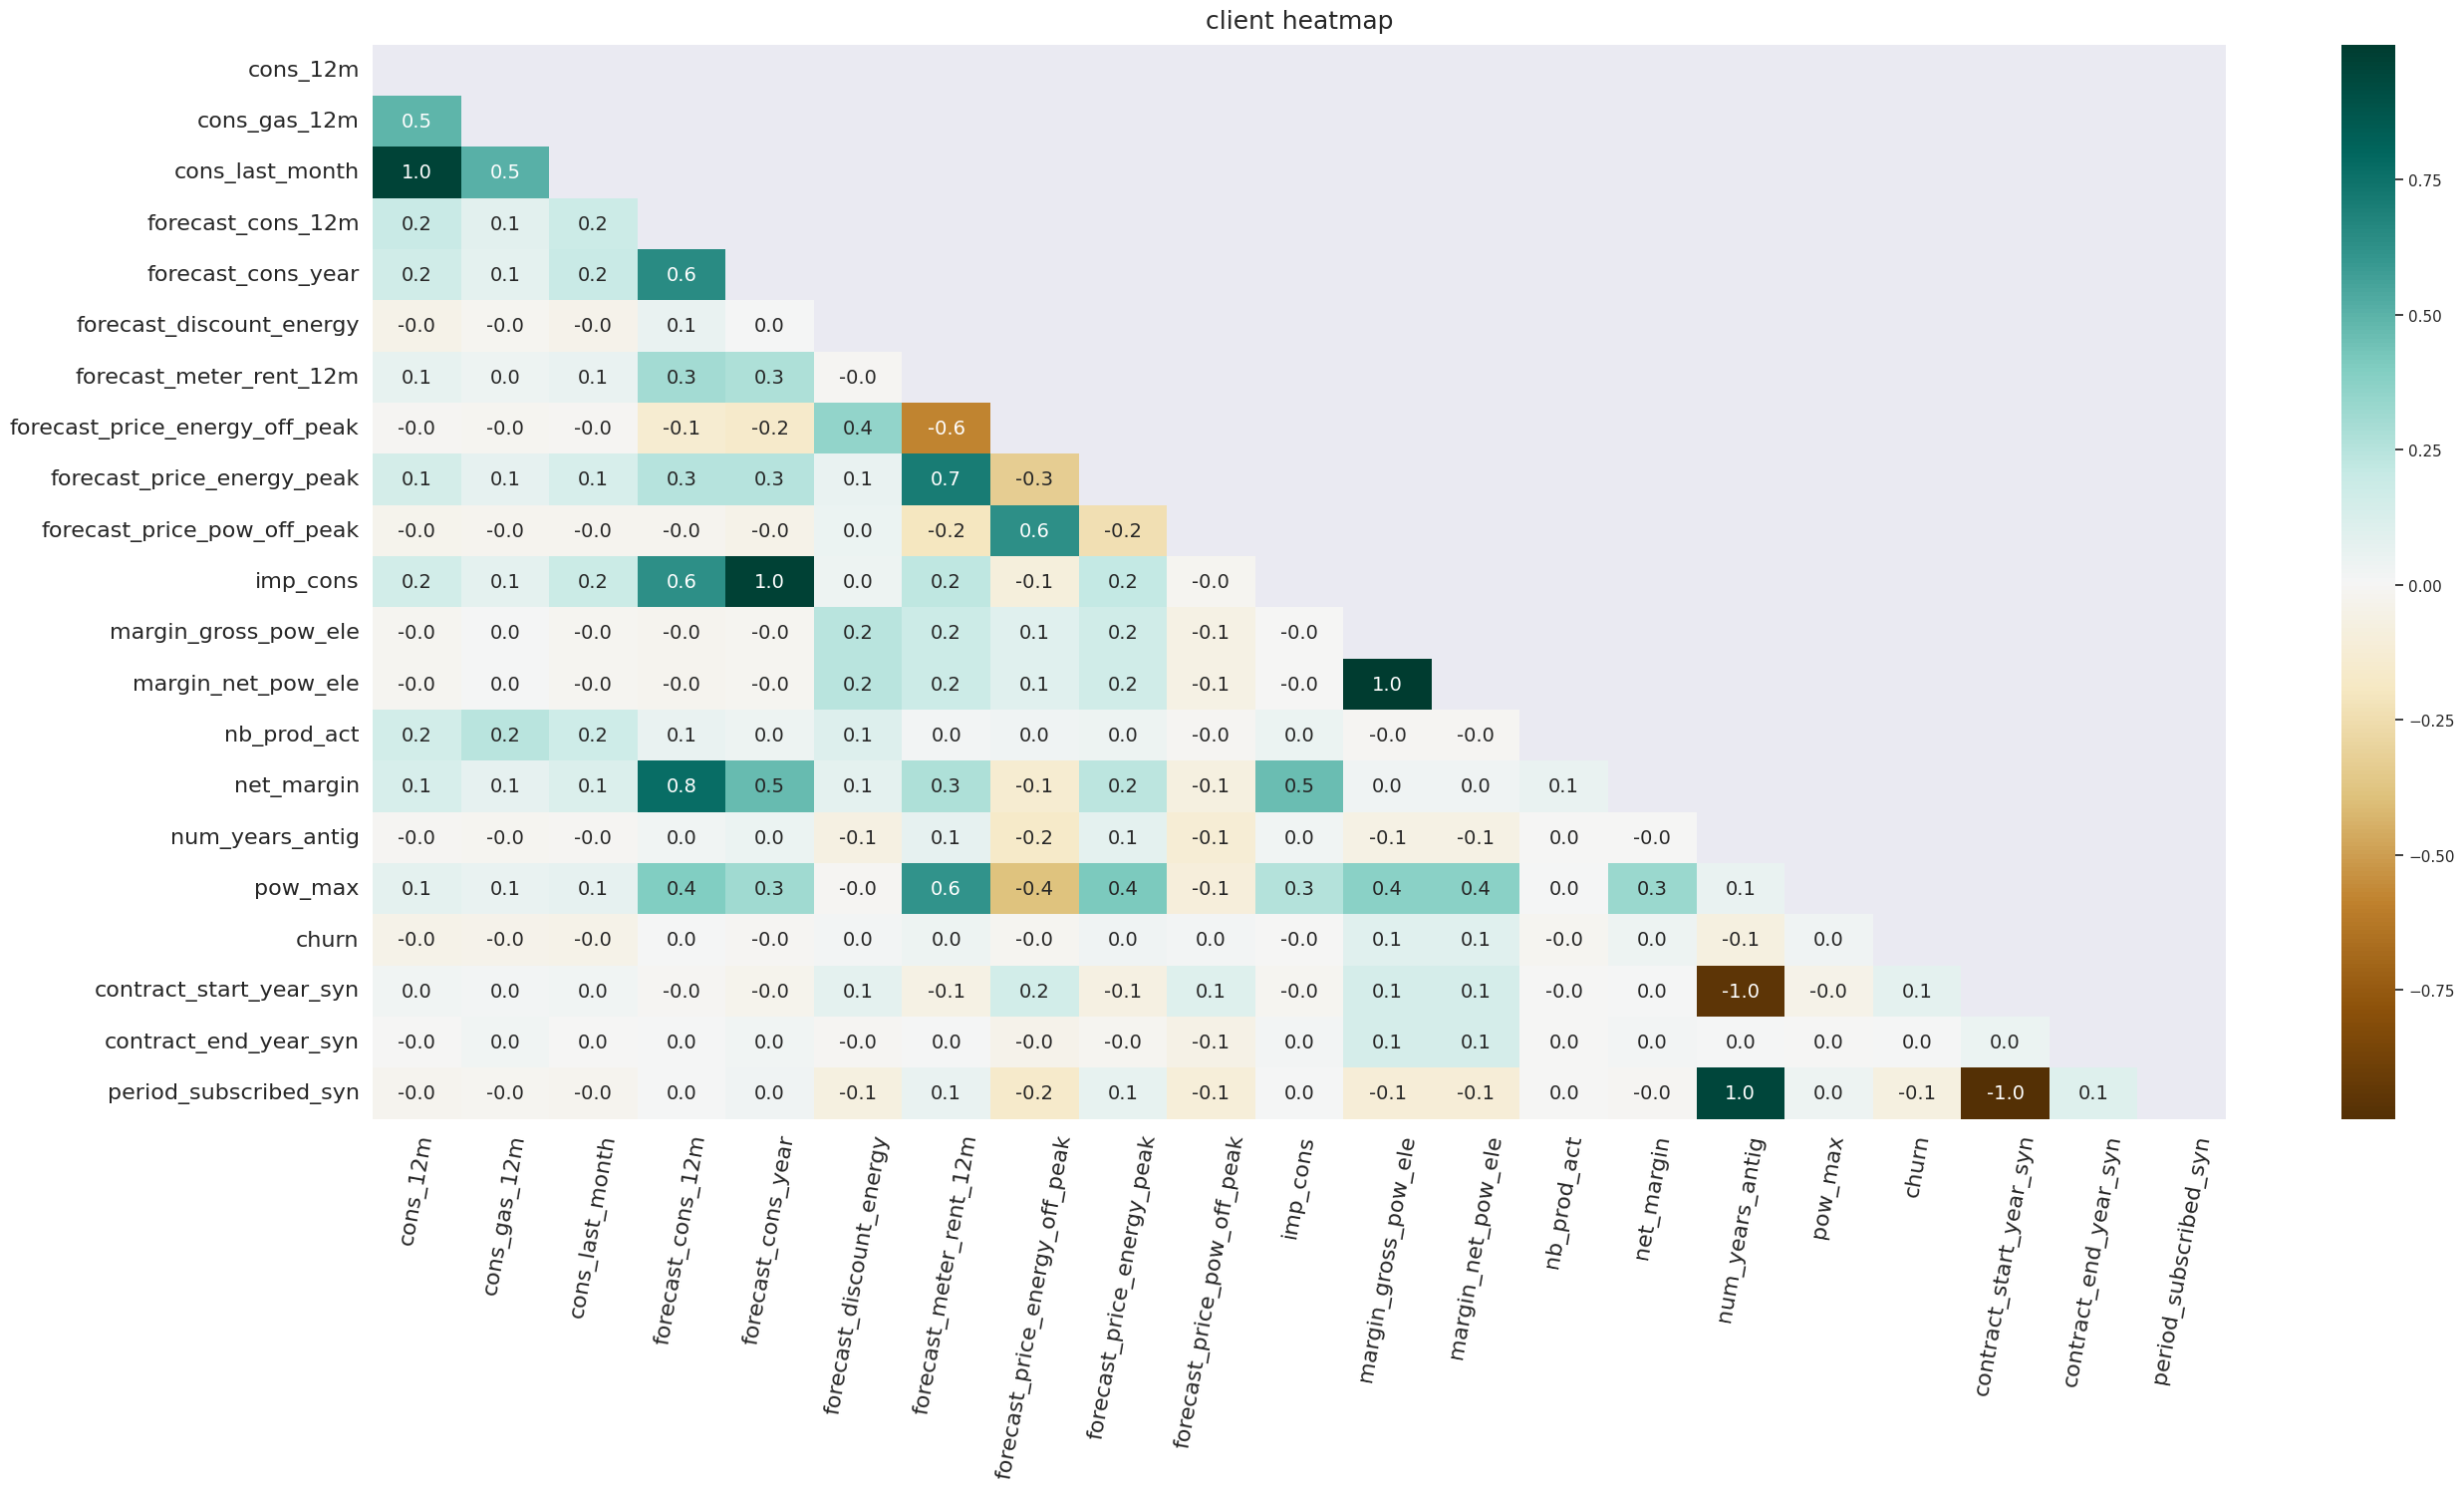

In [31]:
plt.figure(figsize=(30, 14))
corr_map(client, 'client heatmap', 'pearson')

This shows a lot of weak Pearson correlations between the features. Let's take this a step further and explore the monotonicity.

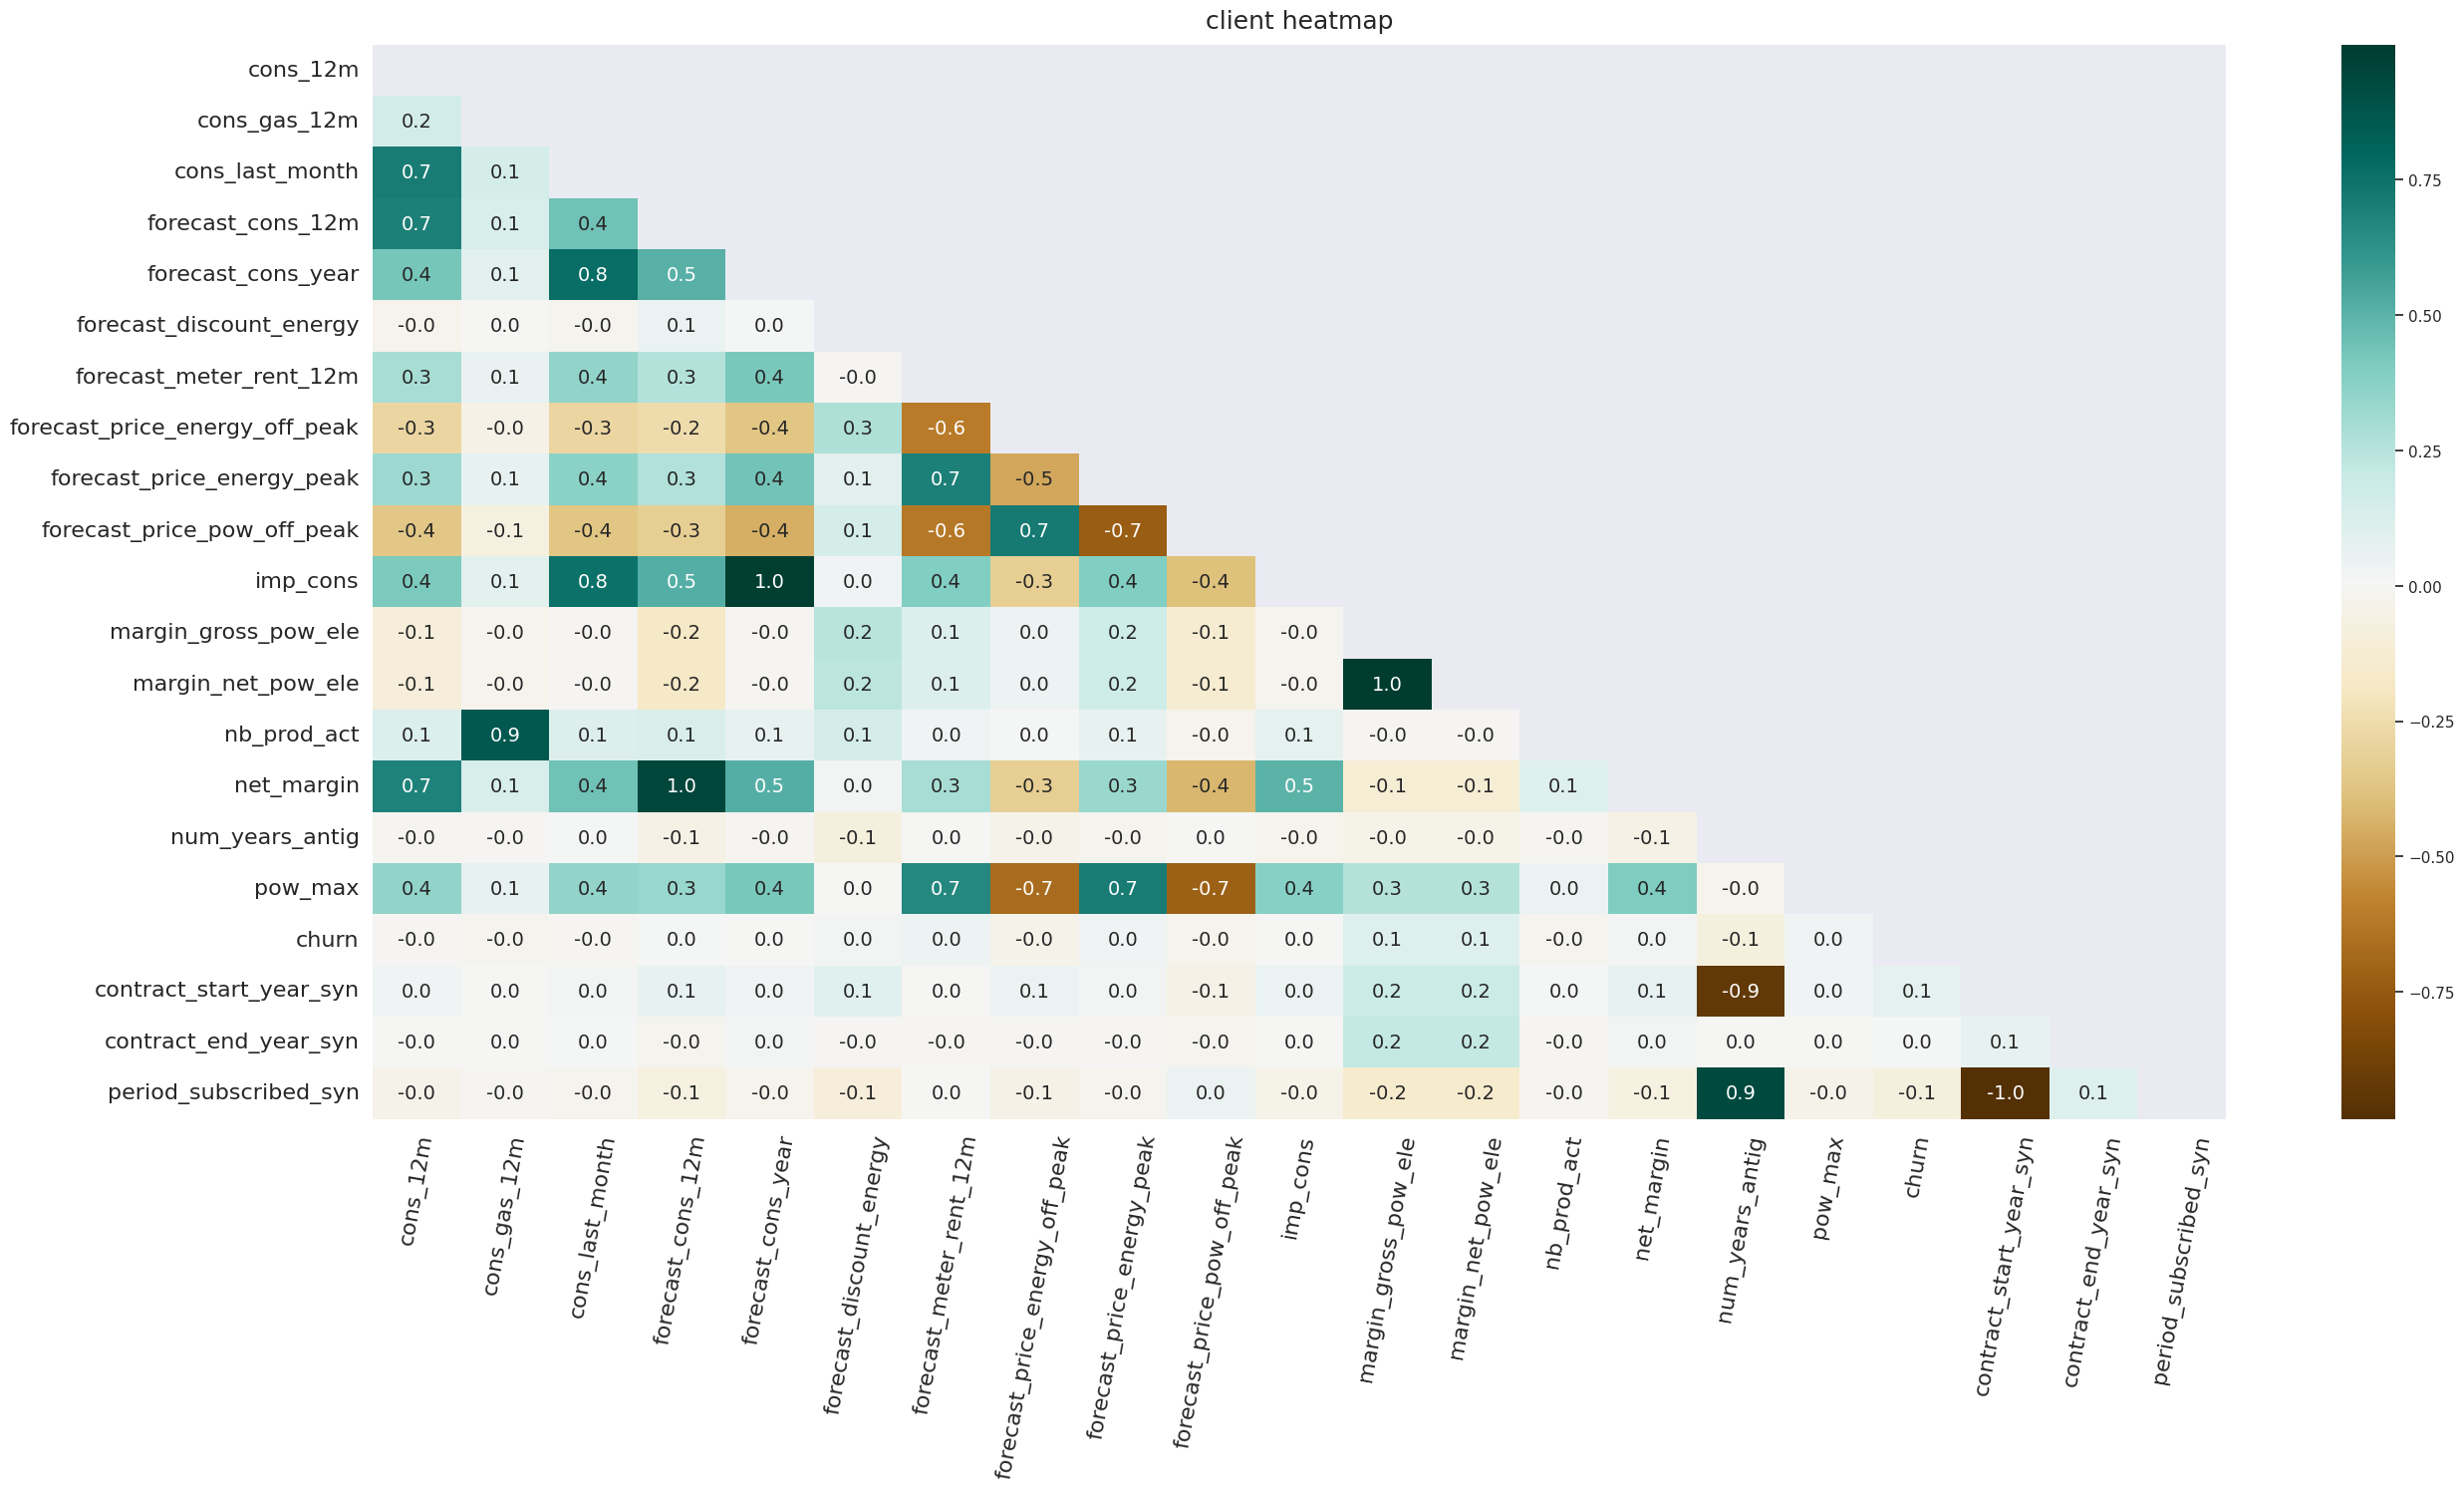

In [32]:
plt.figure(figsize=(30, 14))
corr_map(client, 'client heatmap')

Now this is far more revealing. There's strong trends between a lot of features.

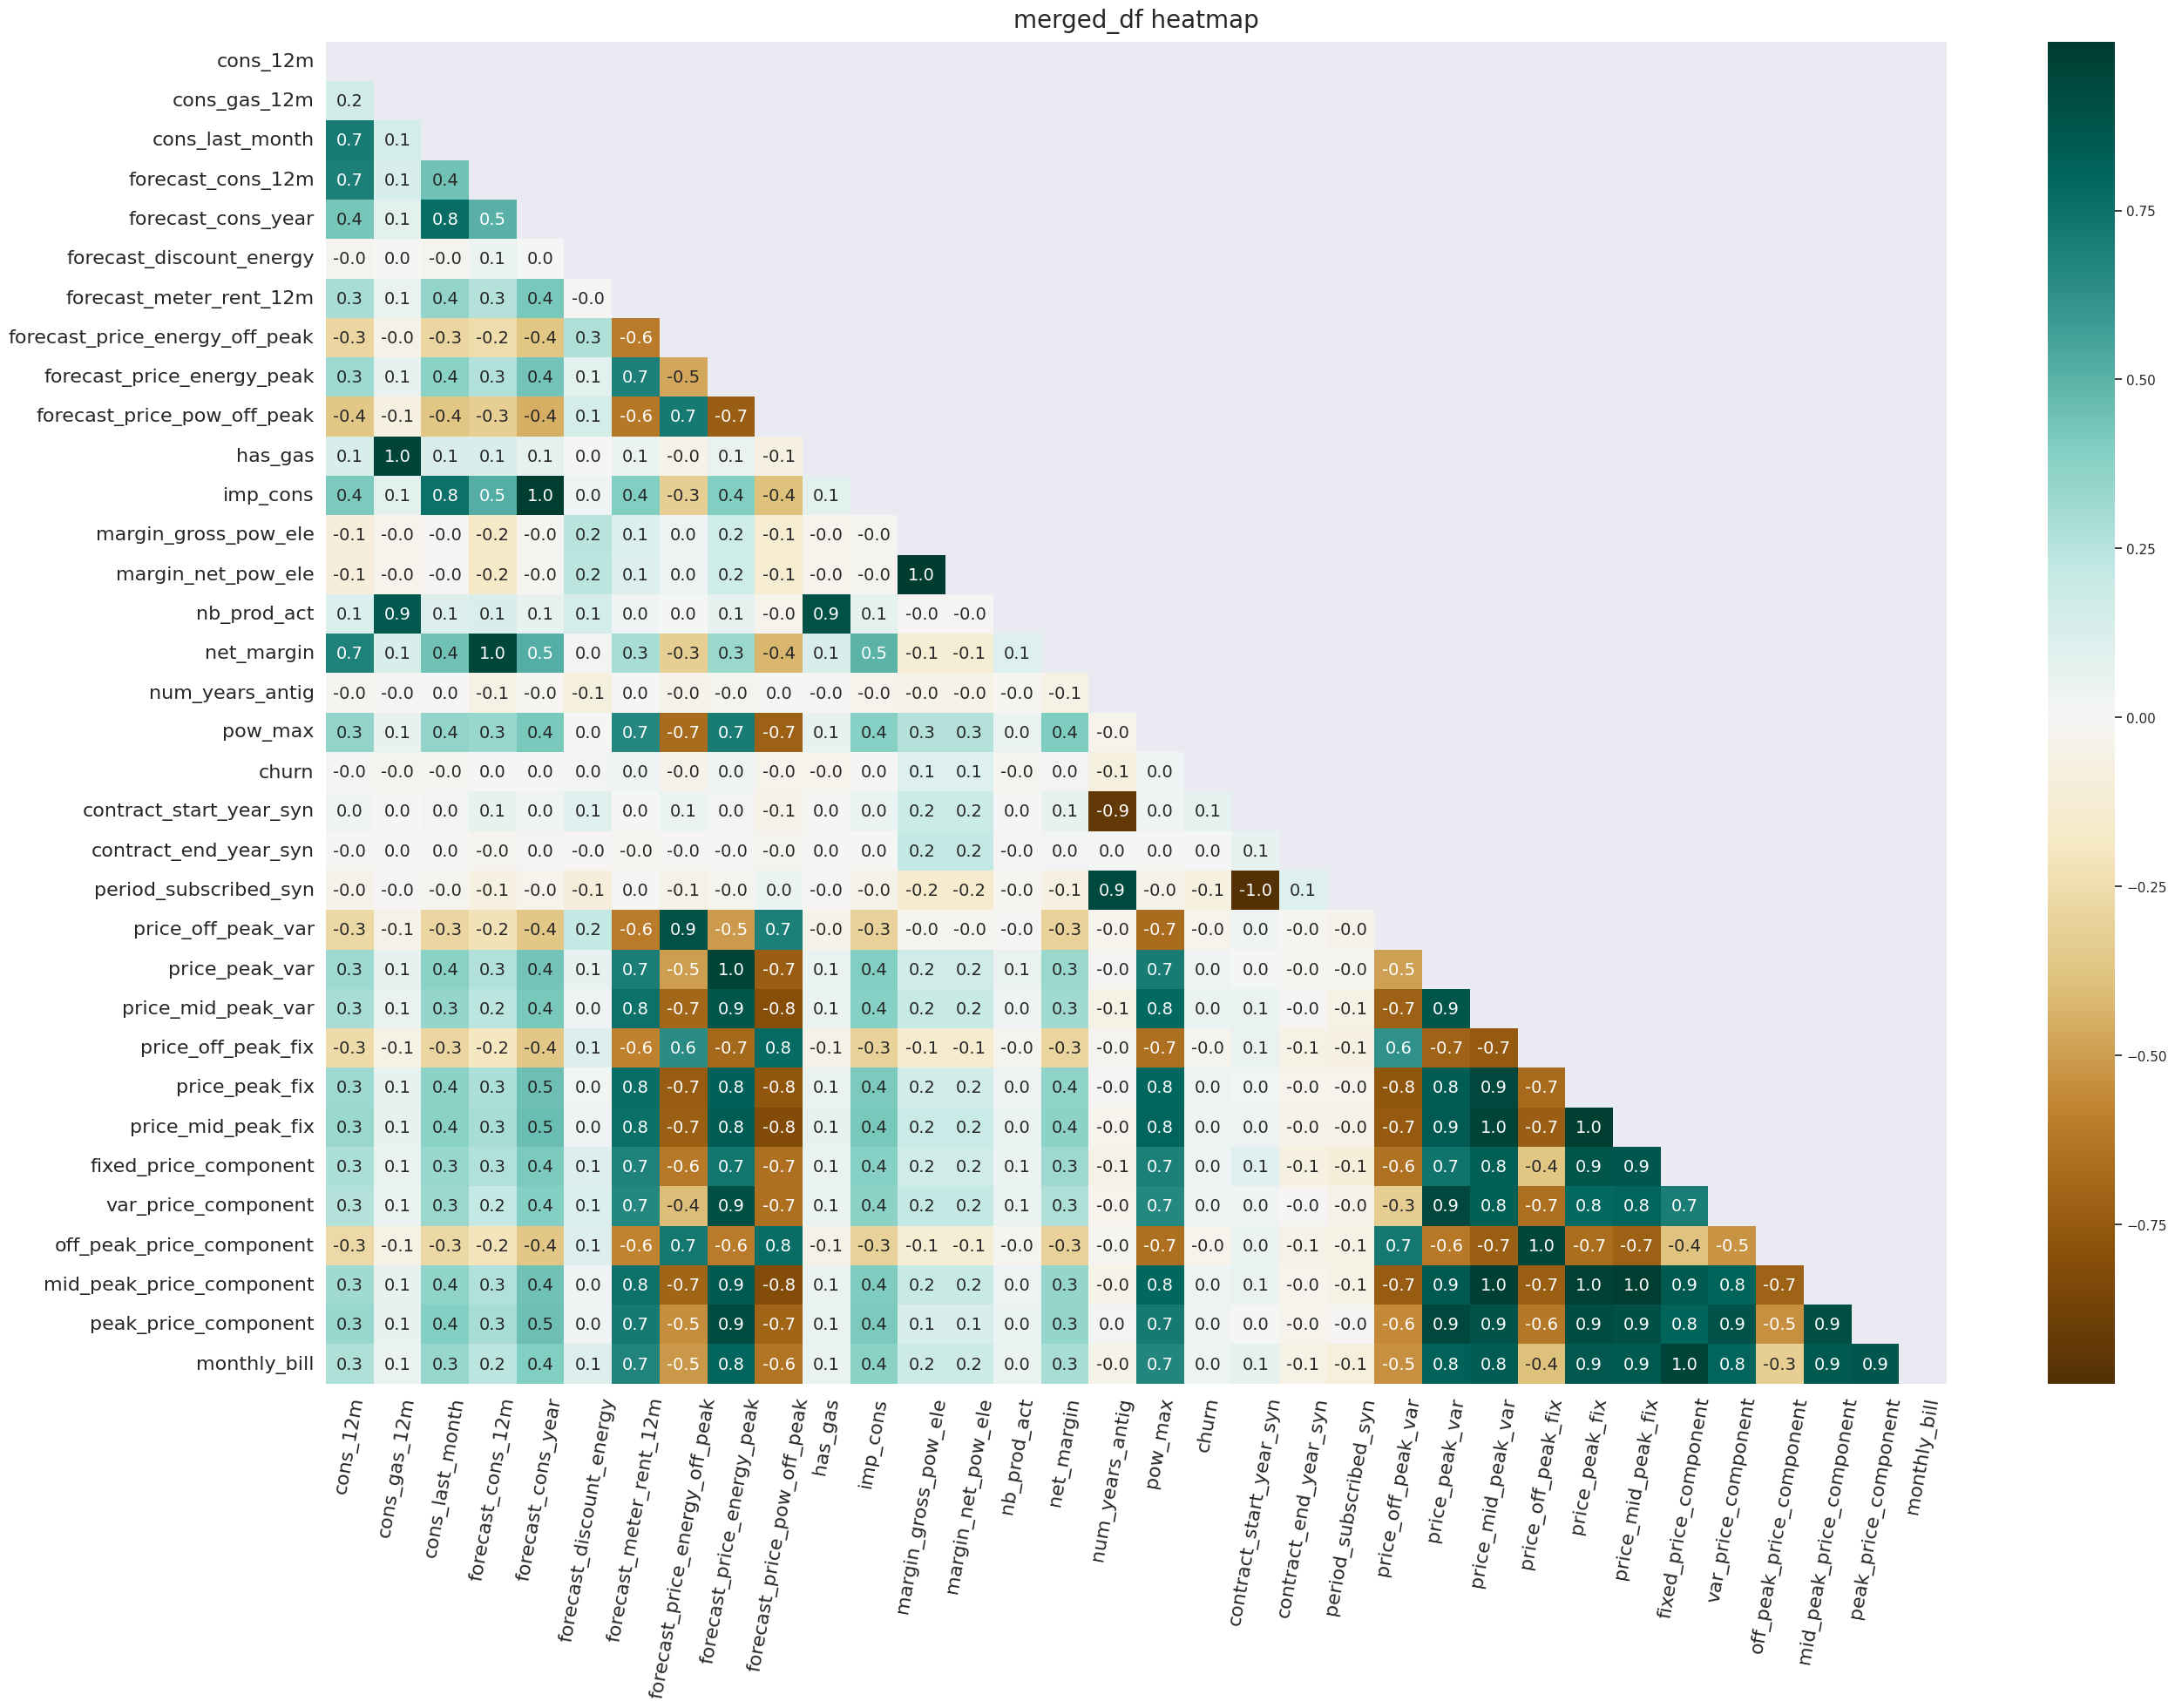

In [33]:
encoded = ['channel_sales_MISSI',
       'channel_sales_epumf', 'channel_sales_ewpak', 'channel_sales_fixdb',
       'channel_sales_foosd', 'channel_sales_lmkeb', 'channel_sales_sddie',
       'channel_sales_usilx', 'origin_up_MISSI', 'origin_up_ewxee',
       'origin_up_kamkk', 'origin_up_ldkss', 'origin_up_lxidp',
       'origin_up_usapb']

plt.figure(figsize=(30, 20))
corr_map(merged_df.drop(encoded, axis = 1), 'merged_df heatmap', 'spearman', annot_size=20)

# Key observations from the heatmaps:

1. forecast_cons_12m and imp_cons, the features describing **future and current demand are monotonic**, as expected.

2. The pairs, (forecast_cons_12m, cons_12m) (forecast_cons_12m, net_margin), and (cons_12m, net_margin) are strongly correlated, which means, the **current demand, future demand of electricity and profits are strongly pairwise-correlated**.

3. **Counterintuitivey, cons_12m is weakly correlated with the other forecast variables** like 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak', forecast_price_pow_off_peak'. Market research into competitors, changing privatized landscape of power distribution should be conducted to understand this inconsistency.

4. Most gas consumers also tend to use 2 products.

5. The forecasted price features are strongly correlated with each other and with the maximum power subscribed (pow_max). 

6. The forecasted price features also are strongly correlated with the pricing dataset features.

7. Off-peak prices seem to be negatively correlated to the other price components. This makes sense, off-peak consumption load decreses as the peak consumption increases and vice-versa. This is a clue that the pricing is indicative of demand.

8. Off-peak fixed price component contributes little to the monthly demand variability.

9. The billing pattern seem to strongly follow the maximum power subscribed, which could imply that the clients' utilization levels are extremely high.

10. The trends are not linear, which means feature transformations need be carried out.

### Lets explore the relationships between price features to the monthly bill, and the churn class.

In [34]:
price.columns[2:]

Index(['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'fixed_price_component', 'var_price_component',
       'off_peak_price_component', 'mid_peak_price_component',
       'peak_price_component', 'monthly_bill'],
      dtype='object')

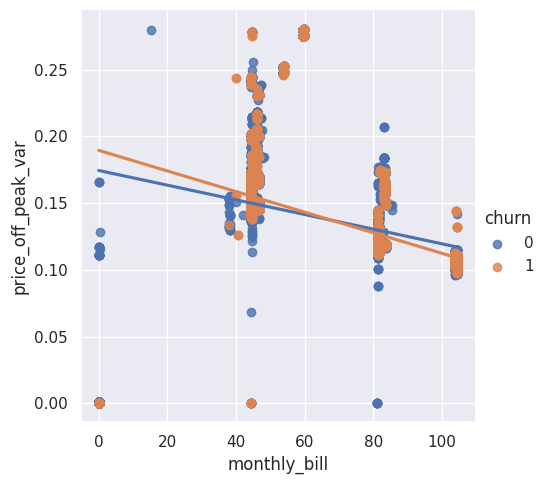

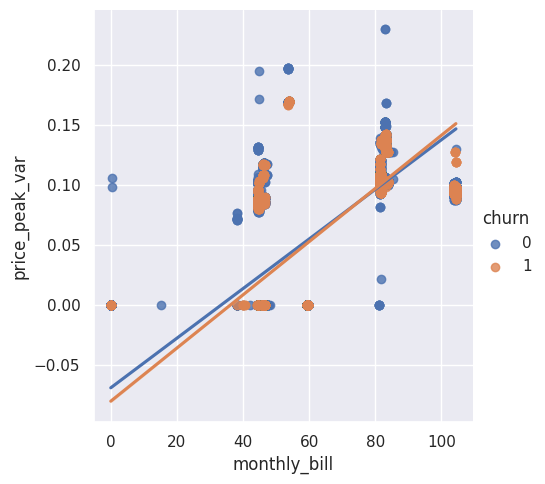

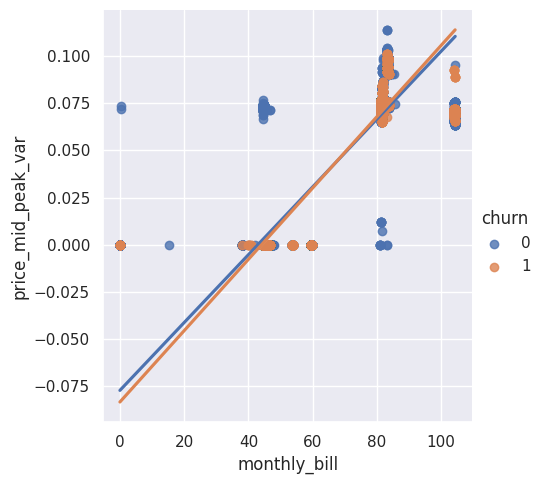

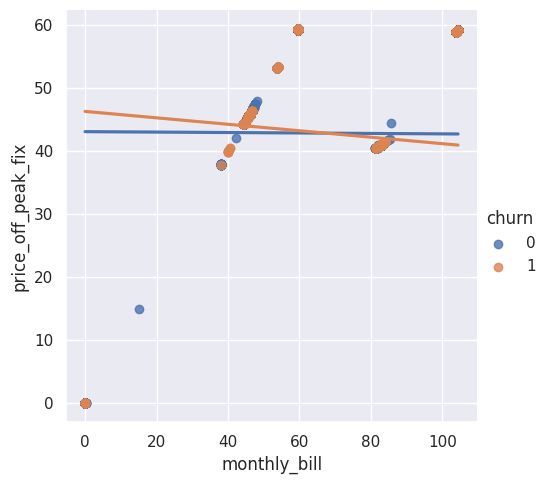

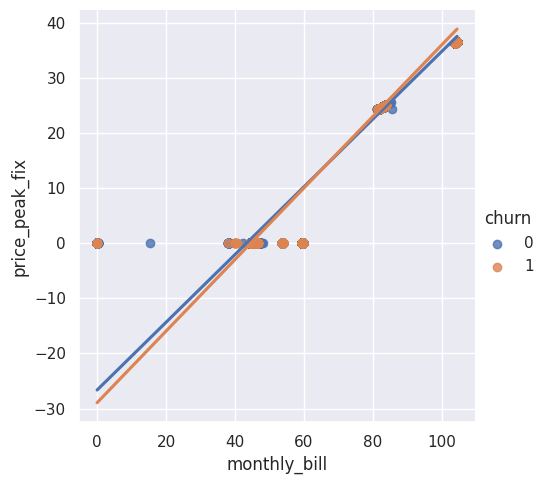

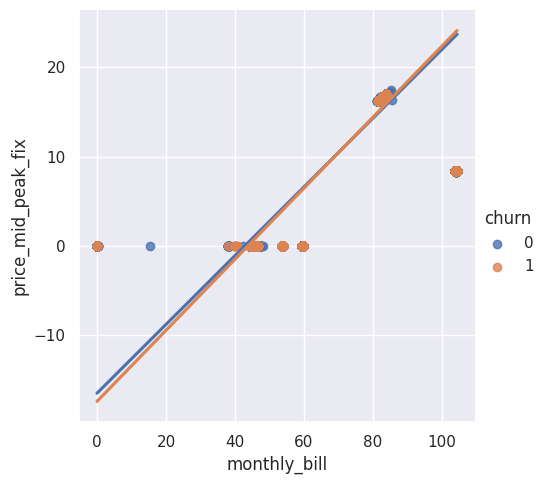

Error in callback <function flush_figures at 0x7849401ab760> (for post_execute):



KeyboardInterrupt


KeyboardInterrupt



In [35]:
for i in price.columns[2:-1]:
    sns.lmplot(data=merged_df, y = i, x = 'monthly_bill', hue = 'churn')
    plt.show()

#### Observations:
1. Churn class seems to cause little variability in different price components.
2. Off-peak price component has little contribution to the variability of average monthly bill for both churn classes.

In [ ]:
## grouping columns for ease
id = 'id'
cons = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 
        'forecast_cons_12m', 'forecast_cons_year', 'pow_max']
dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'contract_start_year', 'contract_end_year']       
forecast = ['forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak'], 
has_gas = 'has_gas',
churn = 'churn'
current_consumption = 'imp_cons' 
profit_margins = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin'] 
num_products = 'nb_prod_act',
aging =[ 'num_years_antig', 'period_subscribed'] 
campaign = 'origin_up',
price_features = ['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'total_price']

In [ ]:
def descr_cat_features(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='O'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')
        
# dataset: a pandas dataframe;
def descr_num_features(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int_columns)!=0:    
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        # 
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    else:
        print('There is no numeric variables in the dataset')

In [ ]:
descr_cat_features(merged_df), descr_num_features(merged_df)

Theres some interesting observations made from this.

1. Older customers (earlier cohorts) tended to  
3. Almost all clients have consumed electricity in the last 12 months while less than 20% have consumed gas in the last 12 months.
4. Almost all clients have subscribed for a period of 3-6 years ('num_years_antig').
5. We will explore some more using visualizations.

#### Let's define some functions for visualizing the relationships between features and target


In [ ]:
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order, hue='churn')
    plt.xticks(rotation =45)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)
    plt.show();

# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    if target_variable != 'churn':
        plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
        plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
        plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
        if if_sort:
            plot_data = plot_data.sort_values(by=[0])
        ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
        plt.xticks(rotation=45)
        plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
        # add label
        for p in ax.patches:
            percentage = '{:.1f}%'.format(p.get_height()*100)
            if percentage!='0.0%':
                x = p.get_x() + p.get_width()/2
                y = 1 - p.get_height()/1.8
                ax.annotate(text=percentage, xy=(x, y), ha='center')
        ax.margins(y=0.1)
        plt.show();

In [ ]:
merged_data.columns

In [ ]:
for i in merged_data.columns:
    sns.boxplot(x="churn", y=i, data=merged_data)
    plt.ylabel('Price of power for the 1st period')
    plt.xticks([0,1],['No', 'Yes'])
    plt.title(i)
#plt.close()

In [ ]:
# Visualize the target variable (churn) in the client data
sns.countplot(x='churn', data=merged_df)
plt.show()

# Visualize the distribution of electricity consumption in the past 12 months
sns.histplot(x='cons_12m', data=merged_df)
plt.show()

# Visualize the relationship between net margin and electricity consumption
sns.scatterplot(x='cons_12m', y='net_margin', data=merged_df)
plt.show()

# Visualize the relationship between churn and number of active products and services
sns.boxplot(x='churn', y='nb_prod_act', data=merged_df)
plt.show()

# Visualize the distribution of energy prices for different periods
price_variable = ['price_off_peak_var', 'price_mid_peak_var','price_peak_var' ]
merged_df[price_variable].plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Periods', labels=['Off-peak', 'Mid-peak' , 'Peak'])
plt.show()


In [ ]:
column_replace = {'pow_max':'subscribed power',
               'origin_up':'campaign',
               'imp_cons':'current_paid_cons',
               'forecast_discount_energy':' forecasted_energy_discount'}

### **Observations and further questions:**

#### **client.csv dataset**
1. There is some inconsistency in the distributions between the new feature created, **period_subscribed** and the dataset feature **num_years_antig**. I need additional information about num_years_antig to analyze this inconsistency, esp about what it represent.

2. The contracts **(contract_end_year) end mostly in 2016** and some in 2017. Was the scope of this analysis limited to pre-2018 consumption?

3. There's a **sudden rise in subscriptions after 2009**, although the increase wasnt consistent. 95% of all subscriptions took place after 2009.

4. **2, 3, & 4 (encoded) electricity campaigns** were the most effective for consumers.

5. **25% of channel_sales** has the value 'MISSING'. Need further information on whether this implies whether these were legacy customers or if data is not collected. Either way, we'll encode this using LabelEncoder() to preserve this information.

6. Nearly 78% have subscribed to 1 product and around 16% subscribed to 2 products (nb_prod_act).

7. Nearly 10% customers have churned in the period considered for this study.

8. Theres a **near consistent churn** among clients who have subscribed to 5 products or lesser and **zero churn** among those subscribed to more than 5.

9. Something happens after 9th year of being subscribed. Theres a decreasing trend of churn as customer age with PowerCo increases, but beyond 9 years, churn increases with age. Possible dissatisfaction / introduction of better products from suppliers other than PowerCo?

#### **price.csv dataset**

1. The variable description in the price.csv dataset uses the words 'energy' and 'power' for fix and var price features. Need clarity on whether this is mean to be used interchangeably or does this mean im supposed to engineer an new feature based on the relation between energy and power remains to be seen.

2. There seems to be something funny going on between fixed and var price features, despite the ambiguity in nomenclature. These relationships are worth exploring, because of some linear trends.

3. The price features with values as zero: Some sort of ambiguity in what these values represent. Were these clients provided free-service? Or were they simply missing/not-applicable observations? Need clarity from PowerCo.

4. **Feature definitions in price.csv dataset seem to be wrong** when comparing the data kernel density distribution with independent sources:
According to the information given below, price-off peak referes to a discounted price when theres low demand. However, the kde plot depicts the off-peak averages on the higher side. There's clearly some inconsistency here. Need further insights from PowerCo on this matter.

[energyaustralia](https://www.energyaustralia.com.au/home/electricity-and-gas/compare-electricity-and-gas-plans/what-peak-electricity)

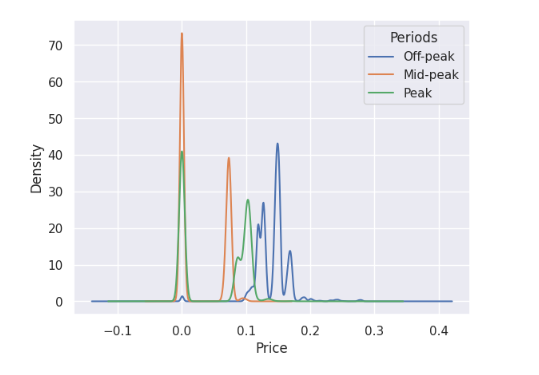

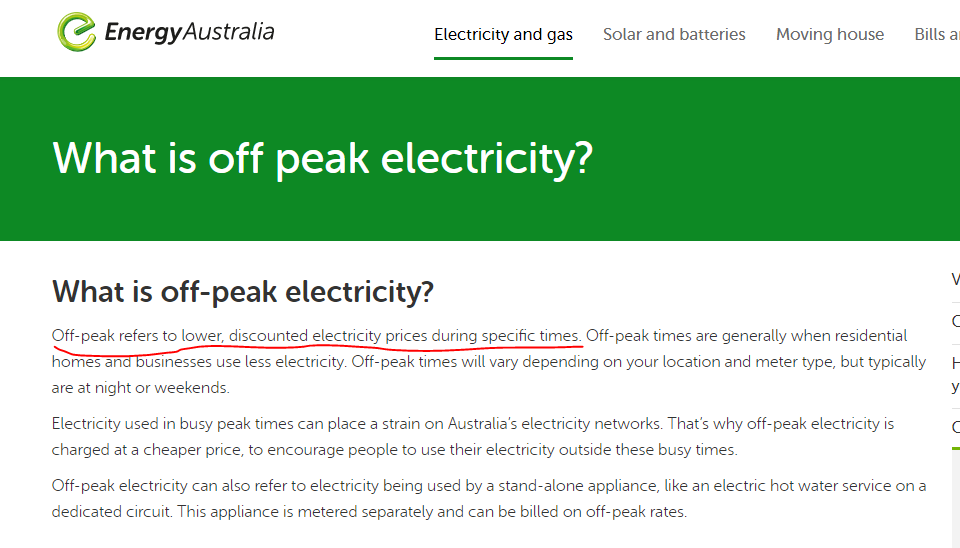



import imblearn
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
smtomek = SMOTETomek()
adasyn = ADASYN()
smote = SMOTE()


--
# Load the client_data.csv file
client_data = pd.read_csv('/kaggle/input/bcg-intership-files/client_data.csv')

# Load the price_data.csv file
price_data = pd.read_csv('/kaggle/input/bcg-intership-files/price_data.csv')

# Merge the two datasets on the 'id' column
merged_data = pd.merge(client_data, price_data, on='id', how='inner')

# Select relevant columns
relevant_columns = ['id', 'has_gas', 'cons_last_month', 'forecast_cons_12m',
                    'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m',
                    'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
                    'forecast_price_pow_off_peak', 'num_years_antig',
                    'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                    'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'churn']
data = merged_data[relevant_columns]

# Convert categorical variable 'has_gas' to binary
data['has_gas'] = data['has_gas'].map({'f': 0, 't': 1})

# Define a function to calculate the price elasticity of demand (PED) for each customer
def calculate_ped(row, reference_price):
    # Calculate the current price and demand
    current_price = row[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].sum() + \
    row[['price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].sum()
    
    current_demand = row['forecast_cons_12m']
    # Calculate the new price and demand after a price change
    new_price = reference_price
    new_demand = row['forecast_cons_12m'] * (1 - row['forecast_price_energy_off_peak'] * (new_price - current_price) / current_price)
    # Calculate the price elasticity of demand
    ped = (new_demand - current_demand) / current_demand / (new_price - current_price) * current_price / current_demand
    return ped

'''Define a function to calculate the price sensitivity of churn for a given reference price'''
def calculate_sensitivity(reference_price):
    '''# Calculate the PED for each customer'''
    data['ped'] = data.apply(lambda row: calculate_ped(row, reference_price), axis=1)
    '''# Calculate the average PED and churn rate for each PED bin'''
    ped_bins = pd.cut(data['ped'], bins=[-np.inf, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, np.inf], include_lowest=True)
    ped_bins_data = data.groupby(ped_bins).agg({'ped': 'mean', 'churn': 'mean', 'id': 'count'})
    '''# Plot the sensitivity curve'''
    plt.plot(ped_bins_data['ped'], ped_bins_data['churn'], label=f"Price = {reference_price}")
    plt.xlabel("Price Elasticity of Demand")
    plt.ylabel("Churn Rate")
    plt.legend()

'''# Calculate the sensitivity curve for different reference prices'''
reference_prices = [100, 80, 60, 40, 20]
for i in reference_prices:
    calculate_sensitivity(i)

plt.show()


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(kind="bar",stacked=True,figsize=size_,rot=rot_,title=title_)

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

In [ ]:
churn = client[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

In [ ]:
consumption = client[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)